In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
from scipy.special import boxcox, inv_boxcox

# Import Data for V1.1 Feature Selection

In [44]:
X_train= pd.read_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/x_Train.csv')
X_test= pd.read_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/x_Test.csv')
y_train= pd.read_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/y_Train.csv')
y_test= pd.read_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/y_Test.csv')
XS_train= pd.read_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/xs_Train.csv')
XS_test= pd.read_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/xs_Test.csv')
ys_train= pd.read_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/ys_Train.csv')
ys_test= pd.read_csv('C:/Users/jmeis/NYC_DSA/HousingPrices/Data/Version_1.5/ys_Test.csv')
finalDF = pd.read_csv('../Data/Version_1.5/TestDumbVersion_1.5.csv')
finalSmartDF = pd.read_csv('../Data/Version_1.5/TestSmartVersion_1.5.csv')

In [45]:
finalSmartDF.drop(['Unnamed: 0'], axis = 1, inplace = True)
finalDF.drop(['Unnamed: 0'], axis = 1, inplace = True)
#finalSmartDF.drop(['Unnamed: 0.1'], axis = 1, inplace = True)
finalDF.drop(['Unnamed: 0.1'], axis = 1, inplace = True)

In [46]:
len(X_train.columns)

113

In [47]:
columnList1 = []
for i in finalDF.columns:
    columnList1.append(i)
    for i in X_train.columns:
        columnList1.append(i)
        for i in X_test.columns:
            columnList1.append(i)
columnSet = set(columnList1)


In [48]:
columnList2 = list(columnSet)
len(columnList2)

116

In [49]:
addList = []
for i in columnList2:
    if i not in X_train.columns:
        addList.append(i)
X_train[addList] = 0
addList = []
for i in columnList2:
    if i not in finalDF.columns:
        addList.append(i)
finalDF[addList] = 0
addList = []
for i in columnList2:
    if i not in X_test.columns:
        addList.append(i)
X_test[addList] = 0

In [50]:
len(X_test.columns)

116

In [51]:
columnList1 = []
for i in finalSmartDF.columns:
    columnList1.append(i)
    for i in XS_train.columns:
        columnList1.append(i)
        for i in XS_test.columns:
            columnList1.append(i)
columnSet = set(columnList1)

In [52]:
columnList2 = list(columnSet)
len(columnList2)

32

In [53]:
addList = []
for i in columnList2:
    if i not in XS_train.columns:
        addList.append(i)
XS_train[addList] = 0
addList = []
for i in columnList2:
    if i not in finalSmartDF.columns:
        addList.append(i)
finalSmartDF[addList] = 0
addList = []
for i in columnList2:
    if i not in XS_test.columns:
        addList.append(i)
XS_test[addList] = 0

In [54]:
len(XS_test.columns)

32

## Order All columns in all DFs

In [55]:
X_train = X_train.reindex(sorted(X_train.columns), axis = 1)
XS_train = XS_train.reindex(sorted(XS_train.columns), axis = 1)
X_test = X_test.reindex(sorted(X_test.columns), axis = 1)
XS_test = XS_test.reindex(sorted(XS_test.columns), axis = 1)
finalDF = finalDF.reindex(sorted(finalDF.columns), axis = 1)
finalSmartDF = finalSmartDF.reindex(sorted(finalSmartDF.columns), axis = 1)

# Use BoxCox to transform target variable

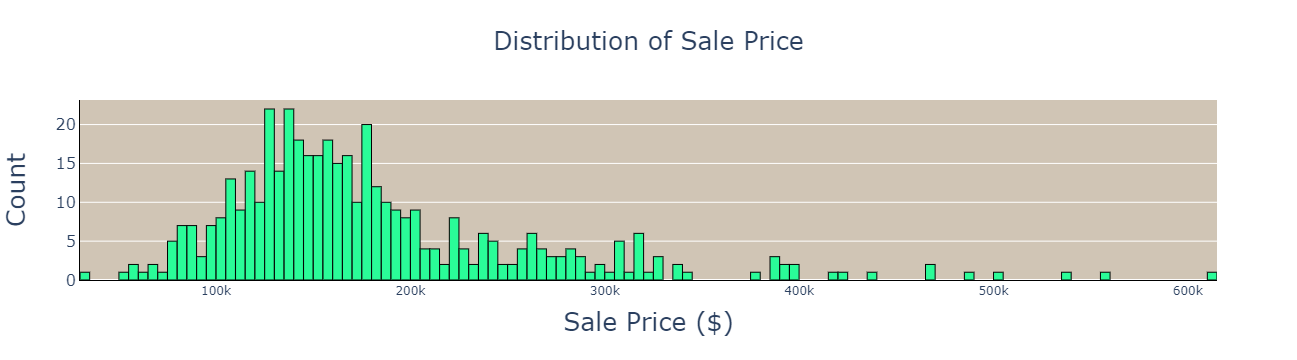

In [56]:
fig = px.histogram(y_test, x = 'SalePrice' ,color_discrete_sequence=['#2AFC98','#FF9FE5' ],nbins=200,
                  title = 'Distribution of Sale Price',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Sale Price ($)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

In [57]:
y_train, y_trainLambda = stats.boxcox(y_train.SalePrice)


In [58]:
ys_train, ys_trainLambda = stats.boxcox(ys_train.SalePrice)

In [59]:
y_test = stats.boxcox(y_test.SalePrice, lmbda = y_trainLambda)

In [60]:
ys_test = stats.boxcox(ys_test.SalePrice, lmbda = ys_trainLambda)

In [61]:
y_train = pd.DataFrame(y_train)
y_train.columns = ['SalePrice']
y_test = pd.DataFrame(y_test)
y_test.columns = ['SalePrice']

In [62]:
ys_train = pd.DataFrame(ys_train)
ys_train.columns = ['SalePrice']
ys_test = pd.DataFrame(ys_test)
ys_test.columns = ['SalePrice']

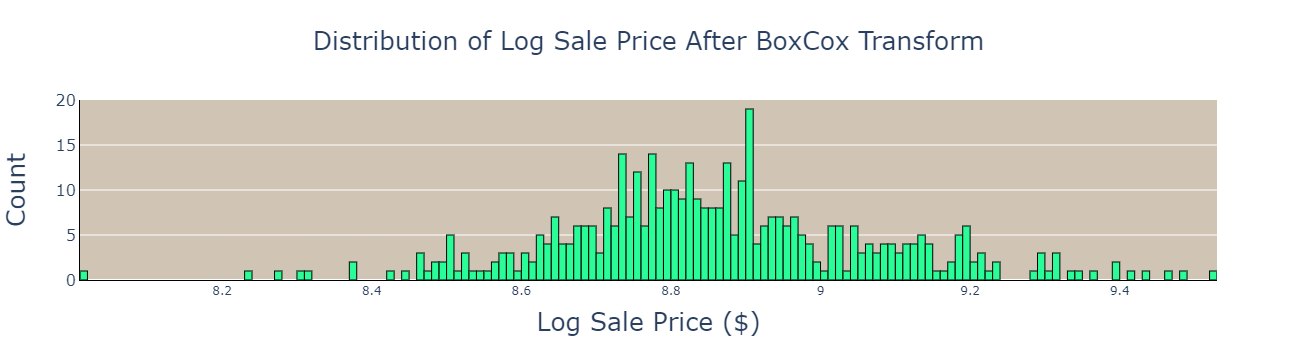

In [63]:
fig = px.histogram(y_test, x = 'SalePrice' ,color_discrete_sequence=['#2AFC98','#FF9FE5' ],nbins = 200,
                  title = 'Distribution of Log Sale Price After BoxCox Transform',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Log Sale Price ($)',
    yaxis_title = 'Count',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

In [64]:
X_train

BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                   0                0               0                0   
1                   0                0               0                0   
2                   0                0               0                0   
3                   0                0               0                0   
4                   0                0               0                0   
...               ...              ...             ...              ...   
1004                0                0               0                0   
1005                0                1               0                0   
1006                0                0               0                0   
1007                0                0               0                0   
1008                0                0               0                0   

      BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_None  \
0                   0                0                0                  0   
1                   0                0                1                  0   
2                   0                0                1                  0   
3                   0                0                1                  0   
4                   0                0                1                  0   
...               ...              ...              ...                ...   
1004                0                0                1                  0   
1005                0                0                1                  0   
1006                0                0                1                  0   
1007                0                0                0                  0   
1008                0                1                0                  0   

      BsmtFinish  CentralAir_Y  ...  SaleType_ConLD  SaleType_ConLI  \
0       0.935975             1  ...               0               0   
1       0.935975             1  ...               0               0   
2      -1.182826             1  ...               0               0   
3      -0.335305             0  ...               0               0   
4      -1.182826             1  ...               0               0   
...          ...           ...  ...             ...             ...   
1004   -1.182826             1  ...               0               0   
1005    0.088455             0  ...               0               0   
1006   -1.182826             1  ...               0               0   
1007    0.935975             1  ...               0               0   
1008   -1.182826             1  ...               0               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  Street_Pave  \
0                  0             0             0            1            1   
1                  0             0             0            1            1   
2                  0             0             0            1            1   
3                  0             0             0            1            1   
4                  0             1             0            0            1   
...              ...           ...           ...          ...          ...   
1004               0             0             0            1            1   
1005               0             0             0            1            1   
1006               0             1             0            0            1   
1007               0             0             0            1            1   
1008               0             0             0            1            1   

         TotBr     TotSq  YearRemodAdd  
0     1.012361  0.524490      0.194079  
1     1.653197  1.589440      0.242616  
2    -0.910147 -0.505983      0.485299  
3    -1.550983 -0.991212     -1.698851  
4     0.371525 -0.479168      1.019203  
...        ...       ...           ...  
1004 -0.269311 -0.189307     -0.631044  
1005 -0.269311  0.566628     -1.698851  
1006  0.3

In [65]:
X_test

BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                  0                0               1                0   
1                  0                0               0                0   
2                  0                0               0                0   
3                  0                0               0                0   
4                  0                0               0                0   
..               ...              ...             ...              ...   
428                0                0               0                0   
429                0                0               0                1   
430                0                0               0                0   
431                0                0               0                0   
432                0                0               0                0   

     BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtExposure_None  \
0                  0                0                1                  0   
1                  0                0                1                  0   
2                  0                0                1                  0   
3                  0                0                1                  0   
4                  0                0                1                  0   
..               ...              ...              ...                ...   
428                0                0                1                  0   
429                0                0                0                  0   
430                0                0                1                  0   
431                0                1                0                  0   
432                0                0                0                  1   

     BsmtFinish  CentralAir_Y  ...  SaleType_ConLD  SaleType_ConLI  \
0      0.935975             1  ...               0               0   
1      0.088455             1  ...               0               0   
2      0.935975             1  ...               0               0   
3     -1.182826             1  ...               0               0   
4      0.088455             0  ...               0               0   
..          ...           ...  ...             ...             ...   
428    0.512215             1  ...               0               0   
429    0.935975             1  ...               0               0   
430   -0.759066             1  ...               0               0   
431   -0.335305             1  ...               0               0   
432   -2.030347             1  ...               0               0   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  Street_Pave  \
0                 0             0             0            1            1   
1                 0             0             0            1            1   
2                 0             0             0            1            1   
3                 0             0             0            1            1   
4                 0             0             0            0            1   
..              ...           ...           ...          ...          ...   
428               0             0             0            1            1   
429               0             0             0            1            1   
430               0             0             0            1            1   
431               0             0             0            1            1   
432               0             0             0            1            1   

        TotBr     TotSq  YearRemodAdd  
0   -0.269311 -0.216122      0.922130  
1    1.012361  0.694320     -1.698851  
2    0.371525  1.175718      0.679446  
3   -1.550983 -0.389783      0.533836  
4   -0.269311  0.869258     -1.698851  
..        ...       ...           ...  
428 -1.550983 -0.836705     -1.407631  
429 -0.269311  0.470860      1.019203  
430 -0.910147 -0.239107      0.485299  
431 -0.269311 -0.640059  

# Fit an ElasticNet Model With GridSearch

In [66]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [67]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parametersGrid = {"max_iter": [10, 12, 15, 18],
                "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                "l1_ratio": np.arange(0.0, 1.0, 0.1)}
eNet = ElasticNet(normalize=True)
gridEn = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10, n_jobs = -1)
gridEn.fit(X_train, y_train)
predEn = gridEn.predict(X_test)
    

In [68]:
gridEn.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.4, 'max_iter': 18}

In [69]:
PredGridEn = pd.concat([pd.Series(predEn), y_test], axis = 1)
PredGridEn.columns = ['Predicted', 'Actual']
PredGridEn


Predicted    Actual
0     8.896719  8.887317
1     8.868105  8.756363
2     9.109401  9.112309
3     8.839522  8.849539
4     8.759361  8.760285
..         ...       ...
428   8.638575  8.759307
429   8.946731  8.943177
430   8.816014  8.799720
431   8.663833  8.686831
432   8.582320  8.506762

[433 rows x 2 columns]

In [70]:
PredGrid = pd.DataFrame()
PredGrid['Predicted'] = inv_boxcox(PredGridEn['Predicted'], y_trainLambda)
PredGrid['Actual'] = inv_boxcox(PredGridEn['Actual'], y_trainLambda)
PredGrid

Predicted    Actual
0    176130.522916  173000.0
1    166783.995617  135000.0
2    265489.198334  267000.0
3    157967.488598  161000.0
4    135763.715666  136000.0
..             ...       ...
428  108307.174725  135750.0
429  193816.581063  192500.0
430  151084.751502  146500.0
431  113521.656099  118500.0
432   97579.168200   84900.0

[433 rows x 2 columns]

## Lets score ourselves

In [71]:
PredGrid['Difference']=(PredGrid['Predicted'] - PredGrid['Actual'])**2
PredGrid.Difference.sum()


284317866063.84375

In [72]:
PredGrid.Difference.mean()**.5


25624.66091991481

In [73]:
gridEn.score(X_test, y_test)

0.885187615428725

In [74]:
gridEn.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.5,
 'estimator__max_iter': 1000,
 'estimator__normalize': True,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': ElasticNet(normalize=True),
 'n_jobs': -1,
 'param_grid': {'max_iter': [10, 12, 15, 18],
  'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
  'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'r2',
 'verbose': 0}

## Lets try a Lasso Model

In [75]:
from sklearn.linear_model import Lasso

In [76]:
logit = Lasso()

In [77]:
logit.fit(X_train, y_train)

Lasso()

In [78]:
parametersGrid = {
                "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
                }
logit = Lasso(normalize=True)
gridLasso = GridSearchCV(logit, parametersGrid, scoring='r2', cv=10, n_jobs = -1)
gridLasso.fit(X_train, y_train)
predLasso = gridLasso.predict(X_test)

In [79]:
LassoDF = pd.DataFrame(gridLasso.best_estimator_.coef_)
G = pd.concat([pd.Series(X_train.columns), LassoDF], axis = 1)
G.columns = ['Feature', 'Lasso Coefficient']
G.sort_values('Lasso Coefficient')

Feature  Lasso Coefficient
21        Condition2_PosN          -0.692520
33        Functional_Maj2          -0.099533
79    Neighborhood_IDOTRR          -0.052804
80   Neighborhood_MeadowV          -0.047114
87   Neighborhood_OldTown          -0.040542
..                    ...                ...
38         Functional_Typ           0.028531
96            OverallQual           0.048712
76   Neighborhood_Crawfor           0.052032
9            CentralAir_Y           0.052835
114                 TotSq           0.070710

[116 rows x 2 columns]

In [80]:
for i in range(len(G)):
    print(G.sort_values('Lasso Coefficient').iloc[i])

Feature              Condition2_PosN
Lasso Coefficient           -0.69252
Name: 21, dtype: object
Feature              Functional_Maj2
Lasso Coefficient          -0.099533
Name: 33, dtype: object
Feature              Neighborhood_IDOTRR
Lasso Coefficient              -0.052804
Name: 79, dtype: object
Feature              Neighborhood_MeadowV
Lasso Coefficient               -0.047114
Name: 80, dtype: object
Feature              Neighborhood_OldTown
Lasso Coefficient               -0.040542
Name: 87, dtype: object
Feature              BldgType_Twnhs
Lasso Coefficient         -0.037107
Name: 2, dtype: object
Feature              Neighborhood_BrDale
Lasso Coefficient              -0.034897
Name: 72, dtype: object
Feature              Functional_Mod
Lasso Coefficient         -0.025943
Name: 36, dtype: object
Feature              LandSlope_Sev
Lasso Coefficient        -0.024536
Name: 61, dtype: object
Feature              BldgType_TwnhsE
Lasso Coefficient          -0.017384
Name: 3, dtype: o

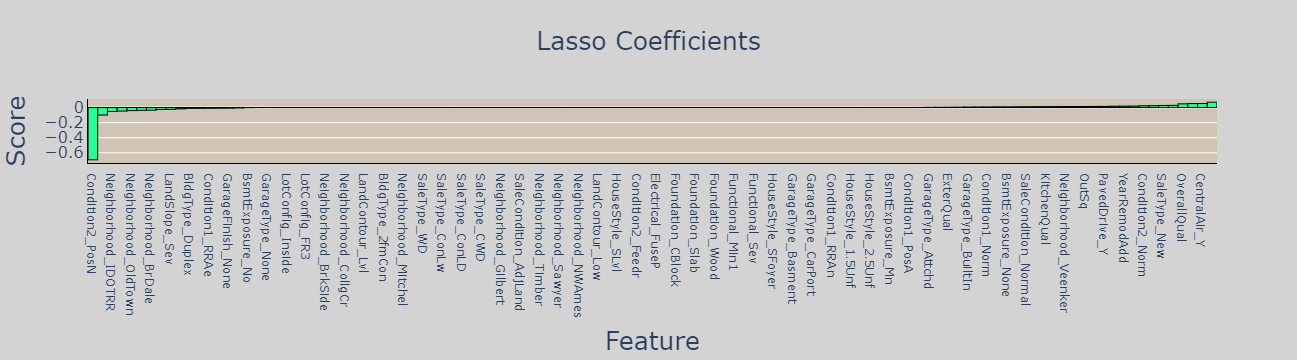

In [81]:
fig = px.bar(G.sort_values('Lasso Coefficient'),#.loc[G['Lasso Coefficient'] == 0],
             x = 'Feature', y = 'Lasso Coefficient' ,color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Lasso Coefficients',
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Feature',
    yaxis_title = 'Score',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    paper_bgcolor = 'lightgray',
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

In [82]:
gridLasso.best_estimator_.score(X_test, y_test)

0.8806367618795903

In [83]:
LassoPred = inv_boxcox(gridLasso.predict(X_test), y_trainLambda)

In [84]:
LassoPred

array([173535.78504854, 166238.0967419 , 264573.48576105, 161509.51664543,
       138189.10782341, 127769.70867385, 133335.43339359, 431421.37742551,
       193283.43217331, 122821.6808934 , 153526.91942579, 121326.59205292,
       174776.7740595 , 130788.25338731, 288331.86377658, 121457.68189975,
       265114.14681175, 193693.50793702, 110785.99488074,  96460.01994317,
       306981.84872675, 266821.65494369, 237882.64633556, 127717.45064243,
       193813.67516634, 164098.86152666, 220437.20148893, 137825.16800397,
       191565.18289352, 132486.6927135 , 154941.32759406, 110030.80626121,
       150941.28118018, 128243.97281022,  94190.25317401, 125857.71216144,
       147247.3929758 , 212544.69811294, 143359.00031737, 233209.43894971,
       258982.83070057, 199437.5606423 , 367212.54963537, 146984.83106366,
        95324.77670007, 245699.83159233, 119592.61389809, 205342.66464317,
       164883.85452505, 178859.48524686, 133188.16426753, 153880.52021585,
       197884.85814193, 1

## How about a Random Forest

In [85]:
XS_test

BldgType  BsmtExposure  BsmtFinish  CentralAir  Condition1  Condition2  \
0           3             3    0.935975           1           2           1   
1           0             3    0.088455           1           2           1   
2           0             3    0.935975           1           2           1   
3           0             3   -1.182826           1           2           1   
4           0             3    0.088455           0           0           1   
..        ...           ...         ...         ...         ...         ...   
428         0             3    0.512215           1           2           1   
429         4             0    0.935975           1           2           1   
430         0             3   -0.759066           1           0           1   
431         0             2   -0.335305           1           1           1   
432         0             4   -2.030347           1           2           1   

     Electrical  ExterQual  Fireplaces  Foundation  ...  Neighborhood  \
0             3   1.054105   -0.953275           2  ...            16   
1             3  -0.695054    2.170866           0  ...            18   
2             3   1.054105    0.608796           2  ...             5   
3             3  -0.695054    0.608796           2  ...            17   
4             3  -0.695054    0.608796           0  ...            17   
..          ...        ...         ...         ...  ...           ...   
428           0  -0.695054   -0.953275           1  ...            12   
429           3   1.054105    0.608796           2  ...             0   
430           3  -0.695054    2.170866           1  ...            12   
431           3  -0.695054   -0.953275           1  ...            19   
432           3  -0.695054   -0.953275           1  ...             7   

        OutSq  OverallQual  PavedDrive  SaleCondition  SaleType  Street  \
0   -0.984719     0.654846           2              4         5       1   
1    1.887588    -1.529321           2              4         5       1   
2    0.496314     1.382902           2              4         5       1   
3    0.477080     1.382902           2              4         5       1   
4   -0.497453    -0.073209           2              3         1       1   
..        ...          ...         ...            ...       ...     ...   
428 -1.157827    -1.529321           2              4         5       1   
429 -0.112769     0.654846           2              4         5       1   
430 -0.080712    -0.801265           2              4         5       1   
431 -0.497453    -1.529321           2              4         5       1   
432 -1.157827    -1.529321           2              0         5       1   

        TotBr     TotSq  YearRemodAdd  
0   -0.269311 -0.216122      0.922130  
1    1.012361  0.694320     -1.698851  
2    0.371525  1.175718      0.679446  
3   -1.550983 -0.389783      0.533836  
4   -0.269311  0.869258     -1.698851  
..        ...       ...           ...  
428 -1.550983 -0.836705     -1.407631  
429 -0.269311  0.470860      1.019203  
430 -0.910147 -0.239107      0.485299  
431 -0.269311 -0.640059     -1.164948  
432 -1.550983 -2.080423      1.019203  

[433 rows x 32 columns]

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr = RandomForestRegressor()
rfr.fit(XS_train, y_train)
rfr.score(XS_test, y_test)

0.8942754953135723

### Let's do some parameter tuning

In [88]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [18, 20, 22],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [3,4, 5],
    'max_leaf_nodes': [700, 800, 1000],
    'max_samples': [None],
    
}
grid = GridSearchCV(rfr, params, refit=True, verbose=3, n_jobs=-1)
grid.fit(XS_train, ys_train)
grid.score(XS_test, ys_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


0.8903436033442931

In [89]:
grid.best_params_

{'max_depth': 20,
 'max_leaf_nodes': 800,
 'max_samples': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [251]:
rfrFeatureImp = pd.DataFrame(rfr.feature_importances_)
rfrFeatureImp = pd.concat([pd.DataFrame(grid.feature_names_in_), rfrFeatureImp], axis = 1)
rfrFeatureImp.columns = ['Feature', 'Importance']
obCols = ['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','Foundation', 'BsmtExposure', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
rfrFeatureImp.sort_values('Importance', ascending = False, inplace = True)
rfrFeatOb = rfrFeatureImp.loc[rfrFeatureImp['Feature'].isin(obCols)]
numCols = ['LotArea', 'OverallQual', 'YearRemodAdd', 'ExterQual', 'KitchenQual','Fireplaces', 'GarageCars', 'MiscVal', 'TotSq', 'OutSq', 'TotBr', 'BsmtFinish', 'SalePrice']
rfrFeatNum = rfrFeatureImp.loc[rfrFeatureImp['Feature'].isin(numCols)]

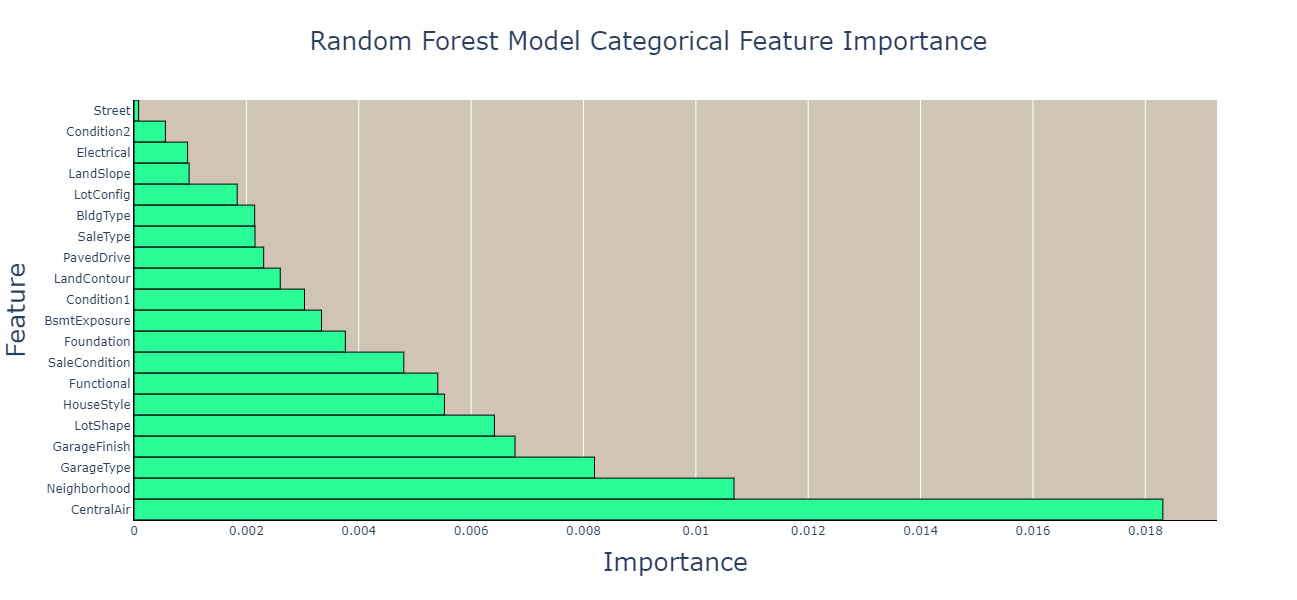

In [209]:
fig = px.bar(rfrFeatOb, x = 'Importance', y = 'Feature', color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Random Forest Model Categorical Feature Importance',
             height = 600,
             width = 1200,
             
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Importance',
    yaxis_title = 'Feature',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

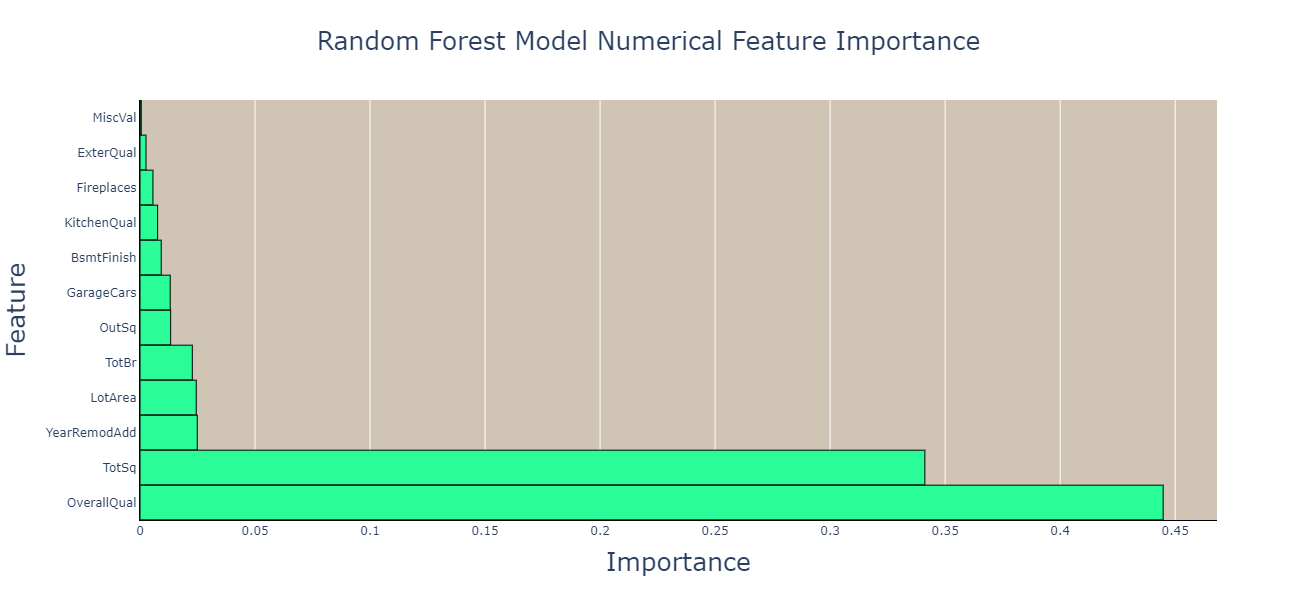

In [211]:
fig = px.bar(rfrFeatNum, x = 'Importance', y = 'Feature', color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'Random Forest Model Numerical Feature Importance',
             height = 600,
             width = 1200,
             
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Importance',
    yaxis_title = 'Feature',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

In [90]:
rfrPred = inv_boxcox(pd.Series(rfr.predict(XS_test)), y_trainLambda)
rfrPred

0      163671.311785
1      145698.320615
2      255788.924539
3      144077.917733
4      142846.154694
           ...      
428    115194.740922
429    209754.556572
430    148229.376458
431    119107.433585
432     89591.565143
Length: 433, dtype: float64

## XG Boost?

In [91]:
import xgboost as xgb

In [92]:
logitXB = xgb.XGBRegressor()
logitXB.fit(XS_train, ys_train)
logitXB.score(XS_test, ys_test)

0.8788734942582

In [93]:
from sklearn.metrics import mean_absolute_error

In [94]:
mean_train = np.mean(ys_train)
mean_train[0]
mean_test = np.mean(ys_test)

In [95]:
baseline_predictions = np.ones(ys_test.shape) * mean_train[0]
baseline_predictions

array([[8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.86915444],
       [8.869

In [96]:
mae_baseline = mean_absolute_error(ys_test, baseline_predictions)
print(f'Baseline MAE is {round(mae_baseline,2)}')

Baseline MAE is 0.16


In [97]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [98]:
params['eval_metric'] = "mae"

In [99]:
num_boost_round = 999

In [100]:
dtrain = xgb.DMatrix(XS_train, label=ys_train)
dtest = xgb.DMatrix(XS_test, label=ys_test)

In [101]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:5.85206
[1]	Test-mae:4.09553
[2]	Test-mae:2.86829
[3]	Test-mae:2.00906
[4]	Test-mae:1.40685
[5]	Test-mae:0.98434
[6]	Test-mae:0.68930
[7]	Test-mae:0.48188
[8]	Test-mae:0.34011
[9]	Test-mae:0.24159
[10]	Test-mae:0.17316
[11]	Test-mae:0.12762
[12]	Test-mae:0.09776
[13]	Test-mae:0.07936
[14]	Test-mae:0.06809
[15]	Test-mae:0.06132
[16]	Test-mae:0.05719
[17]	Test-mae:0.05522
[18]	Test-mae:0.05335
[19]	Test-mae:0.05204
[20]	Test-mae:0.05141
[21]	Test-mae:0.05288
[22]	Test-mae:0.05261
[23]	Test-mae:0.05192
[24]	Test-mae:0.05327
[25]	Test-mae:0.05266
[26]	Test-mae:0.05253
[27]	Test-mae:0.05222
[28]	Test-mae:0.05243
[29]	Test-mae:0.05258
[30]	Test-mae:0.05230


In [102]:
print(f'Best MAE is {round(model.best_score, 2)} with {round(model.best_iteration+1, 2)} rounds')

Best MAE is 0.05 with 21 rounds


In [103]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0         5.861513       0.004560       5.861474      0.028056
1         4.105235       0.003193       4.105196      0.029424
2         2.875188       0.002235       2.875149      0.030381
3         2.014789       0.001565       2.014801      0.028187
4         1.411824       0.001095       1.412321      0.025489
5         0.989893       0.000710       0.990156      0.022335
6         0.694307       0.000404       0.693373      0.019871
7         0.487532       0.000311       0.487810      0.018080
8         0.343202       0.000167       0.344351      0.016023
9         0.242250       0.000297       0.245034      0.014191
10        0.171731       0.000308       0.178261      0.010626
11        0.122695       0.000342       0.132887      0.008665
12        0.089336       0.000415       0.102924      0.007010
13        0.067312       0.000294       0.083558      0.005209
14        0.053303       0.000299       0.072002      0.004610
15        0.044749       0.000550       0.065390      0.003938
16        0.038949       0.000600       0.061563      0.003535
17        0.035120       0.000744       0.059298      0.003308
18        0.032058       0.000831       0.057901      0.002978
19        0.029974       0.000887       0.057063      0.002822
20        0.028337       0.000790       0.056513      0.002876
21        0.026691       0.000859       0.056324      0.002636
22        0.025632       0.000643       0.056132      0.002566
23        0.024259       0.000566       0.055987      0.002699
24        0.023102       0.000690       0.055846      0.002541
25        0.022163       0.000705       0.055667      0.002710
26        0.021266       0.000716       0.055652      0.002775
27        0.020702       0.000820       0.055524      0.002934
28        0.019954       0.000660       0.055453      0.002870
29        0.019212       0.000746       0.055298      0.002956
30        0.018536       0.000844       0.055225      0.002975
31        0.017858       0.000700       0.055215      0.002852
32        0.017142       0.000857       0.055306      0.002961
33        0.016366       0.000839       0.055168      0.003035
34        0.015873       0.000924       0.055116      0.002941

In [104]:
cv_results['test-mae-mean'].min()

0.055115800000000006

In [105]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(8,13)
    for min_child_weight in range(5,10)
]

In [106]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=8, min_child_weight=5
	MAE 0.0546882 for 33 rounds
CV with max_depth=8, min_child_weight=6
	MAE 0.0555234 for 35 rounds
CV with max_depth=8, min_child_weight=7
	MAE 0.0537334 for 26 rounds
CV with max_depth=8, min_child_weight=8
	MAE 0.05381400000000001 for 27 rounds
CV with max_depth=8, min_child_weight=9
	MAE 0.0541938 for 30 rounds
CV with max_depth=9, min_child_weight=5
	MAE 0.054883799999999996 for 41 rounds
CV with max_depth=9, min_child_weight=6
	MAE 0.0551226 for 31 rounds
CV with max_depth=9, min_child_weight=7
	MAE 0.0549036 for 24 rounds
CV with max_depth=9, min_child_weight=8
	MAE 0.0537274 for 29 rounds
CV with max_depth=9, min_child_weight=9
	MAE 0.0548832 for 24 rounds
CV with max_depth=10, min_child_weight=5
	MAE 0.055290799999999994 for 56 rounds
CV with max_depth=10, min_child_weight=6
	MAE 0.0552024 for 23 rounds
CV with max_depth=10, min_child_weight=7
	MAE 0.0558446 for 29 rounds
CV with max_depth=10, min_child_weight=8
	MAE 0.05391119999999999 fo

In [107]:
params['max_depth'] = 12
params['min_child_weight'] = 8

In [108]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [109]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 0.053602 for 26 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.055263799999999995 for 26 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.0543446 for 26 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.054715 for 35 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.05513560000000001 for 26 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.0541284 for 31 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.054815800000000005 for 26 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.053179 for 26 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.0550036 for 22 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.055333999999999994 for 23 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.0559082 for 25 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.05533079999999999 for 27 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.0562666 for 22 rounds
CV with subsample=0.7, colsample=0.9
	MAE 0.0557654 for 24 rounds
CV with subsample=0.7, col

In [110]:
params['subsample'] = .9
params['colsample_bytree'] = .7

In [111]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain,num_boost_round=num_boost_round,seed=42,nfold=5, metrics=['mae'], early_stopping_rounds=10)    
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

Wall time: 0 ns
CV with eta=0.3
Wall time: 608 ms
	MAE 0.053179 for 26 rounds

CV with eta=0.2
Wall time: 619 ms
	MAE 0.0535814 for 36 rounds

CV with eta=0.1
Wall time: 1.99 s
	MAE 0.049934 for 116 rounds

CV with eta=0.05
Wall time: 2.72 s
	MAE 0.0491272 for 190 rounds

CV with eta=0.01
Wall time: 10.1 s
	MAE 0.0489694 for 826 rounds

CV with eta=0.005
Wall time: 9.68 s
	MAE 0.0775744 for 998 rounds

Best params: 0.01, MAE: 0.0489694


In [112]:
params['eta'] = .01

In [113]:
num_boost_round

999

In [114]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

[0]	Test-mae:8.27672
[1]	Test-mae:8.19394
[2]	Test-mae:8.11204
[3]	Test-mae:8.03092
[4]	Test-mae:7.95058
[5]	Test-mae:7.87110
[6]	Test-mae:7.79241
[7]	Test-mae:7.71448
[8]	Test-mae:7.63736
[9]	Test-mae:7.56098
[10]	Test-mae:7.48538
[11]	Test-mae:7.41052
[12]	Test-mae:7.33637
[13]	Test-mae:7.26300
[14]	Test-mae:7.19035
[15]	Test-mae:7.11842
[16]	Test-mae:7.04723
[17]	Test-mae:6.97676
[18]	Test-mae:6.90699
[19]	Test-mae:6.83791
[20]	Test-mae:6.76951
[21]	Test-mae:6.70181
[22]	Test-mae:6.63477
[23]	Test-mae:6.56842
[24]	Test-mae:6.50276
[25]	Test-mae:6.43769
[26]	Test-mae:6.37330
[27]	Test-mae:6.30951
[28]	Test-mae:6.24641
[29]	Test-mae:6.18393
[30]	Test-mae:6.12211
[31]	Test-mae:6.06089
[32]	Test-mae:6.00028
[33]	Test-mae:5.94028
[34]	Test-mae:5.88091
[35]	Test-mae:5.82208
[36]	Test-mae:5.76381
[37]	Test-mae:5.70615
[38]	Test-mae:5.64908
[39]	Test-mae:5.59255
[40]	Test-mae:5.53659
[41]	Test-mae:5.48120
[42]	Test-mae:5.42635
[43]	Test-mae:5.37204
[44]	Test-mae:5.31830
[45]	Test-mae:5.2651

In [115]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-mae:8.27672
[1]	Test-mae:8.19394
[2]	Test-mae:8.11204
[3]	Test-mae:8.03092
[4]	Test-mae:7.95058
[5]	Test-mae:7.87110
[6]	Test-mae:7.79241
[7]	Test-mae:7.71448
[8]	Test-mae:7.63736
[9]	Test-mae:7.56098
[10]	Test-mae:7.48538
[11]	Test-mae:7.41052
[12]	Test-mae:7.33637
[13]	Test-mae:7.26300
[14]	Test-mae:7.19035
[15]	Test-mae:7.11842
[16]	Test-mae:7.04723
[17]	Test-mae:6.97676
[18]	Test-mae:6.90699
[19]	Test-mae:6.83791
[20]	Test-mae:6.76951
[21]	Test-mae:6.70181
[22]	Test-mae:6.63477
[23]	Test-mae:6.56842
[24]	Test-mae:6.50276
[25]	Test-mae:6.43769
[26]	Test-mae:6.37330
[27]	Test-mae:6.30951
[28]	Test-mae:6.24641
[29]	Test-mae:6.18393
[30]	Test-mae:6.12211
[31]	Test-mae:6.06089
[32]	Test-mae:6.00028
[33]	Test-mae:5.94028
[34]	Test-mae:5.88091
[35]	Test-mae:5.82208
[36]	Test-mae:5.76381
[37]	Test-mae:5.70615
[38]	Test-mae:5.64908
[39]	Test-mae:5.59255
[40]	Test-mae:5.53659
[41]	Test-mae:5.48120
[42]	Test-mae:5.42635
[43]	Test-mae:5.37204
[44]	Test-mae:5.31830
[45]	Test-mae:5.2651

In [116]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.044437981176891725

In [117]:
params

{'max_depth': 12,
 'min_child_weight': 8,
 'eta': 0.01,
 'subsample': 0.9,
 'colsample_bytree': 0.7,
 'objective': 'reg:squarederror',
 'eval_metric': 'mae'}

In [118]:
best_model.save_model("my_model.model")

In [119]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
loaded_model.predict(dtest)

array([8.82721  , 8.865008 , 9.134516 , 8.837889 , 8.787369 , 8.763791 ,
       8.765861 , 9.317401 , 8.948276 , 8.724099 , 8.799399 , 8.715879 ,
       8.873711 , 8.7268   , 9.158943 , 8.752082 , 9.145444 , 8.911736 ,
       8.639911 , 8.579433 , 9.222318 , 9.127829 , 9.090781 , 8.71564  ,
       8.966155 , 8.855552 , 9.005725 , 8.778244 , 8.894419 , 8.721116 ,
       8.922488 , 8.611347 , 8.787132 , 8.754441 , 8.605441 , 8.753947 ,
       8.844662 , 8.982023 , 8.792931 , 9.050458 , 9.094153 , 8.93019  ,
       9.225937 , 8.794265 , 8.60779  , 9.065916 , 8.666197 , 9.054308 ,
       8.771383 , 8.920902 , 8.771832 , 8.807779 , 8.957369 , 8.627721 ,
       9.063856 , 8.720817 , 8.752773 , 8.973462 , 8.757169 , 8.449096 ,
       8.410374 , 8.529803 , 8.932336 , 8.889181 , 8.94214  , 8.60501  ,
       9.072274 , 8.884968 , 9.321549 , 8.966221 , 9.351225 , 9.009075 ,
       8.839787 , 9.007264 , 9.18309  , 8.950531 , 8.951466 , 8.442379 ,
       8.625263 , 8.663924 , 8.681164 , 8.864792 , 

In [266]:
feature_important = loaded_model.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.reset_index(inplace=True)
data.columns = ['Feature','Importance']
data
dataNum = data.loc[data['Feature'].isin(numCols)]
dataOb = data.loc[data['Feature'].isin(obCols)]

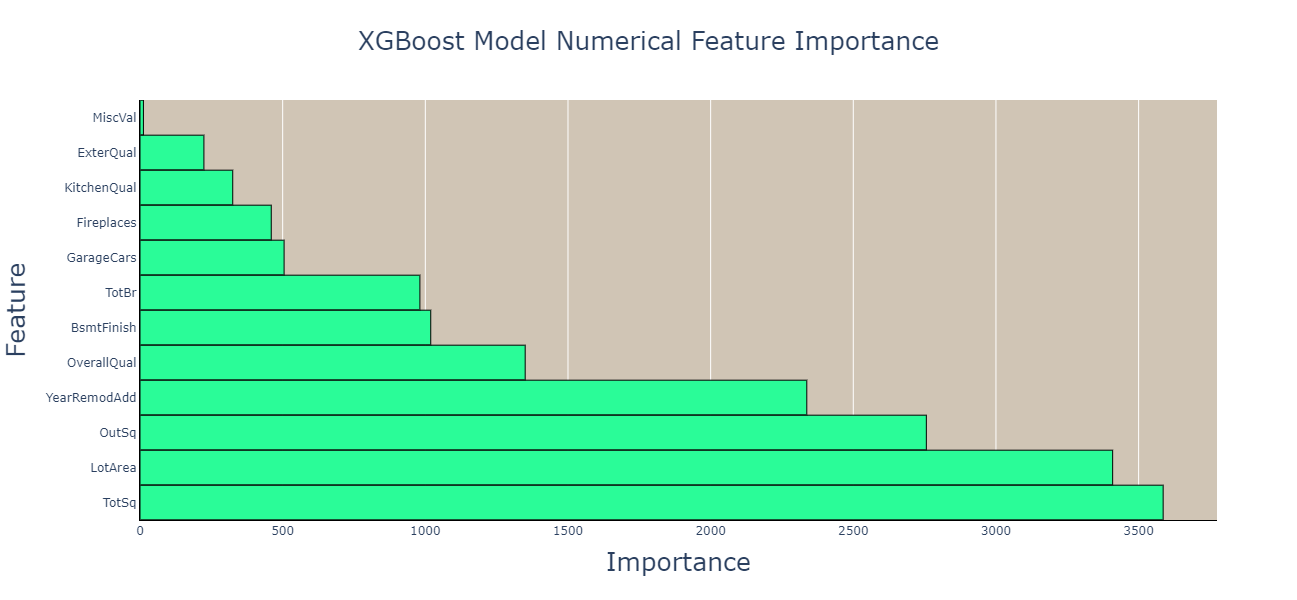

In [230]:
fig = px.bar(dataNum.sort_values('Importance', ascending=False), x = 'Importance', y = 'Feature', color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'XGBoost Model Numerical Feature Importance',
             height = 600,
             width = 1200,
             
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Importance',
    yaxis_title = 'Feature',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

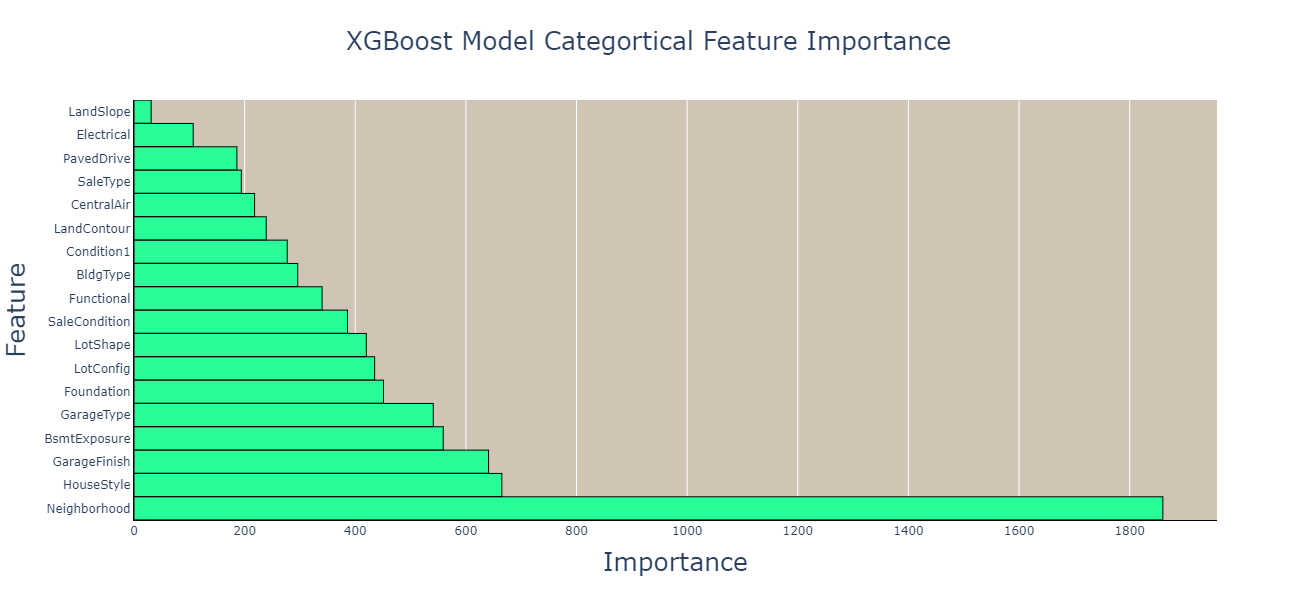

In [232]:
fig = px.bar(dataOb.sort_values('Importance', ascending=False), x = 'Importance', y = 'Feature', color_discrete_sequence=['#2AFC98','#FF9FE5' ],
                  title = 'XGBoost Model Categortical Feature Importance',
             height = 600,
             width = 1200,
             
                   labels = {
                       'variable':''
                   }
                  )
fig.update_layout(
    xaxis_title = 'Importance',
    yaxis_title = 'Feature',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    bargap = 0.01,

    yaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)

## Compare Random Forest and XG Boost Feature Importance

In [267]:
rfrFeatureImp = pd.DataFrame(rfr.feature_importances_)
rfrFeatureImp = pd.concat([pd.DataFrame(grid.feature_names_in_), rfrFeatureImp], axis = 1)
rfrFeatureImp.columns = ['Feature', 'Importance']
obCols = ['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','Foundation', 'BsmtExposure', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
rfrFeatureImp.sort_values('Importance', ascending = False, inplace = True)
rfrFeatOb = rfrFeatureImp.loc[rfrFeatureImp['Feature'].isin(obCols)]
numCols = ['LotArea', 'OverallQual', 'YearRemodAdd', 'ExterQual', 'KitchenQual','Fireplaces', 'GarageCars', 'MiscVal', 'TotSq', 'OutSq', 'TotBr', 'BsmtFinish', 'SalePrice']
rfrFeatNum = rfrFeatureImp.loc[rfrFeatureImp['Feature'].isin(numCols)]

In [268]:
rfrFeatOb.reset_index(inplace = True, drop = True)
rfrFeatNum.reset_index(inplace = True, drop = True)
dataNum.reset_index(inplace = True, drop = True)
dataOb.reset_index(inplace = True, drop = True)

In [277]:
dataOb.loc[len(dataOb)] = ['Condition2', 0]
dataOb.loc[len(dataOb)] = ['Street', 0]

In [282]:
dataNum.sort_values('Importance', ascending = False, inplace = True)
dataOb.sort_values('Importance', ascending = False, inplace = True)

In [283]:
from sklearn import preprocessing

 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(np.array(rfrFeatOb.Importance).reshape(-1,1))
rfrFeatOb['Importance'] = pd.Series(x_scaled.reshape(1,20)[0])
x_scaled = min_max_scaler.fit_transform(np.array(rfrFeatNum.Importance).reshape(-1,1))
rfrFeatNum['Importance'] = pd.Series(x_scaled.reshape(1,len(x_scaled))[0])
x_scaled = min_max_scaler.fit_transform(np.array(dataNum.Importance).reshape(-1,1))
dataNum['Importance'] = pd.Series(x_scaled.reshape(1,len(x_scaled))[0])
x_scaled = min_max_scaler.fit_transform(np.array(dataOb.Importance).reshape(-1,1))
dataOb['Importance'] = pd.Series(x_scaled.reshape(1,len(x_scaled))[0])


In [284]:
obImport = pd.concat([rfrFeatOb.sort_values('Feature'), pd.DataFrame(dataOb.sort_values('Feature').Importance)], axis = 1)
obImport.columns = ['Feature', 'RandomForest Importance', 'XGBoost Importance']
numImport = pd.concat([rfrFeatNum.sort_values('Feature'), pd.DataFrame(dataNum.sort_values('Feature').Importance)], axis = 1)
numImport.columns = ['Feature', 'RandomForest Importance', 'XGBoost Importance']

In [287]:
numImport

Feature  RandomForest Importance  XGBoost Importance
0    OverallQual                 1.000000            1.000000
1          TotSq                 0.766820            0.950476
2   YearRemodAdd                 0.054814            0.767767
3        LotArea                 0.053810            0.650532
4          TotBr                 0.049956            0.374370
5          OutSq                 0.028760            0.281757
6     GarageCars                 0.028348            0.271125
7     BsmtFinish                 0.019551            0.137941
8    KitchenQual                 0.015998            0.125350
9     Fireplaces                 0.011426            0.087577
10     ExterQual                 0.004654            0.059317
11       MiscVal                 0.000000            0.000000

## Manually Score our model

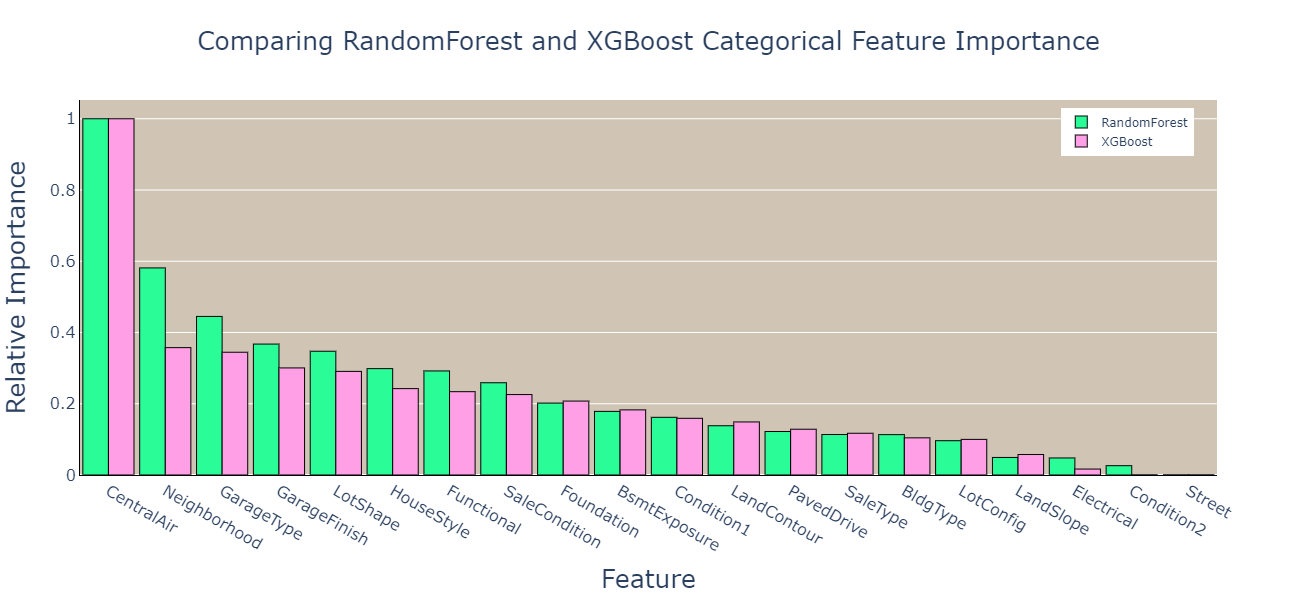

In [306]:
fig = go.Figure(data=[
    go.Bar(name='RandomForest', y=obImport['RandomForest Importance'], x=obImport['Feature'], marker_color = '#2AFC98'),
    go.Bar(name='XGBoost',  y=obImport['XGBoost Importance'], x=obImport['Feature'], marker_color = '#FF9FE5')
])
fig.update_layout(barmode='group',
    title = 'Comparing RandomForest and XGBoost Categorical Feature Importance',
    height = 600,
    width = 1300,
    yaxis_title = 'Relative Importance',
    xaxis_title = 'Feature',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    bargap = 0.1,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size =25),
        linecolor = 'black'  ,
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)
                 
                 
                 
fig.show()

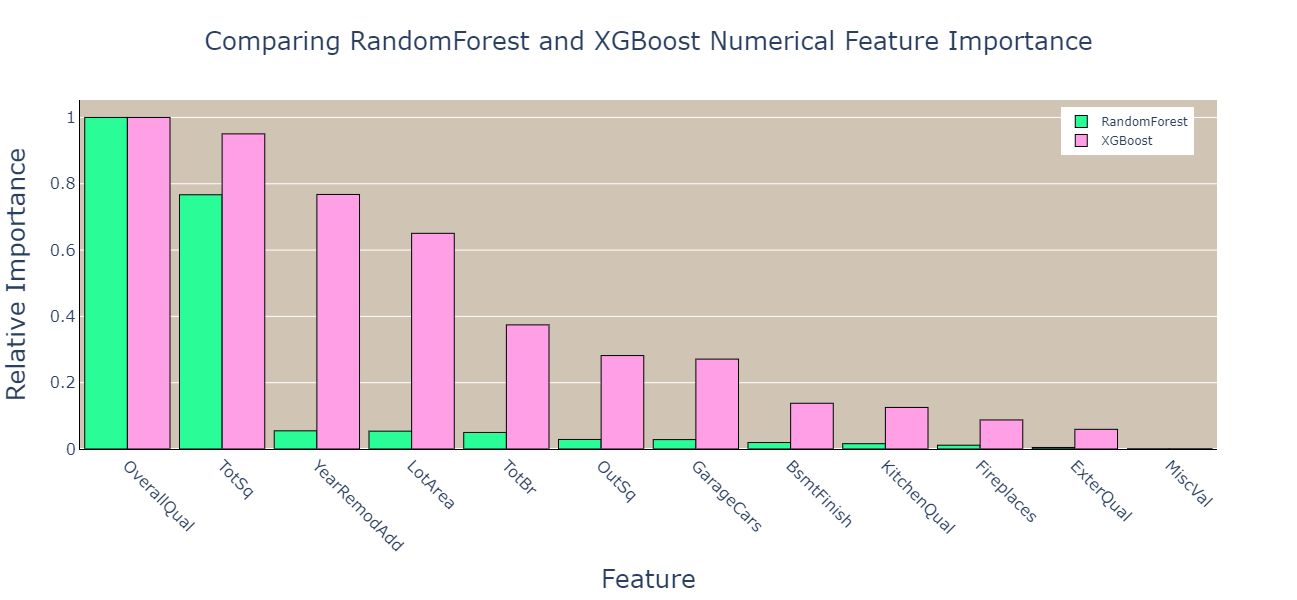

In [309]:
fig = go.Figure(data=[
    go.Bar(name='RandomForest', y=numImport['RandomForest Importance'], x=numImport['Feature'], marker_color = '#2AFC98'),
    go.Bar(name='XGBoost',  y=numImport['XGBoost Importance'], x=numImport['Feature'], marker_color = '#FF9FE5')
])
fig.update_layout(barmode='group',
    title = 'Comparing RandomForest and XGBoost Numerical Feature Importance',
    height = 600,
    width = 1300,
    yaxis_title = 'Relative Importance',
    xaxis_title = 'Feature',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    bargap = 0.1,

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',
    

    ),
    xaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size =25),
        linecolor = 'black',
        tickangle = 45
   
    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(
    marker_line_width=1,
    marker_line_color="black"

)
                 
                 
                 
fig.show()

In [121]:
XGBoostPredictions = pd.concat([inv_boxcox(pd.Series(loaded_model.predict(dtest)), ys_trainLambda), inv_boxcox(ys_test.SalePrice, ys_trainLambda)], axis = 1)
XGBoostPredictions.columns = ['XGBoost', 'Actual']
XGBoostPredictions['Average'] = np.mean(XGBoostPredictions.Actual)
XGBoostPredictions['Residual Squared Error'] = (XGBoostPredictions['XGBoost'] - XGBoostPredictions['Actual'])**2
XGBoostPredictions['Total Squared Error'] = (XGBoostPredictions['Actual'] - XGBoostPredictions['Average'])**2
1- (XGBoostPredictions.sum()[-2]/XGBoostPredictions.sum()[-1] )

0.9148901905473766

# Let's Put all our Models together for some Ensembling 

In [122]:
FullPredicitions = pd.concat([inv_boxcox(pd.Series(loaded_model.predict(dtest)), ys_trainLambda), inv_boxcox(ys_test.SalePrice, ys_trainLambda)], axis = 1)
FullPredicitions.columns = ['XGBoost', 'Actual']

In [123]:
FullPredictions = pd.concat([pd.Series(LassoPred), FullPredicitions], axis = 1)
FullPredictions.columns = ['Lasso','XGBoost', 'Actual']
FullPredictions

Lasso        XGBoost    Actual
0    173535.785049  154322.671875  173000.0
1    166238.096742  165804.187500  135000.0
2    264573.485761  278837.906250  267000.0
3    161509.516645  157478.859375  161000.0
4    138189.107823  143122.468750  136000.0
..             ...            ...       ...
428  106334.320456  112985.500000  135750.0
429  199411.185335  197043.406250  192500.0
430  148875.187377  156127.187500  146500.0
431  113488.348484  120969.648438  118500.0
432   96027.726841   92174.945312   84900.0

[433 rows x 3 columns]

In [124]:
FullPredictions = pd.concat([PredGrid.Predicted, FullPredictions], axis = 1)
FullPredictions.columns = ['ElasticNet','Lasso','XGBoost', 'Actual']
FullPredictions

ElasticNet          Lasso        XGBoost    Actual
0    176130.522916  173535.785049  154322.671875  173000.0
1    166783.995617  166238.096742  165804.187500  135000.0
2    265489.198334  264573.485761  278837.906250  267000.0
3    157967.488598  161509.516645  157478.859375  161000.0
4    135763.715666  138189.107823  143122.468750  136000.0
..             ...            ...            ...       ...
428  108307.174725  106334.320456  112985.500000  135750.0
429  193816.581063  199411.185335  197043.406250  192500.0
430  151084.751502  148875.187377  156127.187500  146500.0
431  113521.656099  113488.348484  120969.648438  118500.0
432   97579.168200   96027.726841   92174.945312   84900.0

[433 rows x 4 columns]

In [125]:
FullPredictions = pd.concat([rfrPred, FullPredictions], axis = 1)
FullPredictions.columns = ['RandomForest','ElasticNet','Lasso','XGBoost', 'Actual']
FullPredictions

RandomForest     ElasticNet          Lasso        XGBoost    Actual
0    163671.311785  176130.522916  173535.785049  154322.671875  173000.0
1    145698.320615  166783.995617  166238.096742  165804.187500  135000.0
2    255788.924539  265489.198334  264573.485761  278837.906250  267000.0
3    144077.917733  157967.488598  161509.516645  157478.859375  161000.0
4    142846.154694  135763.715666  138189.107823  143122.468750  136000.0
..             ...            ...            ...            ...       ...
428  115194.740922  108307.174725  106334.320456  112985.500000  135750.0
429  209754.556572  193816.581063  199411.185335  197043.406250  192500.0
430  148229.376458  151084.751502  148875.187377  156127.187500  146500.0
431  119107.433585  113521.656099  113488.348484  120969.648438  118500.0
432   89591.565143   97579.168200   96027.726841   92174.945312   84900.0

[433 rows x 5 columns]

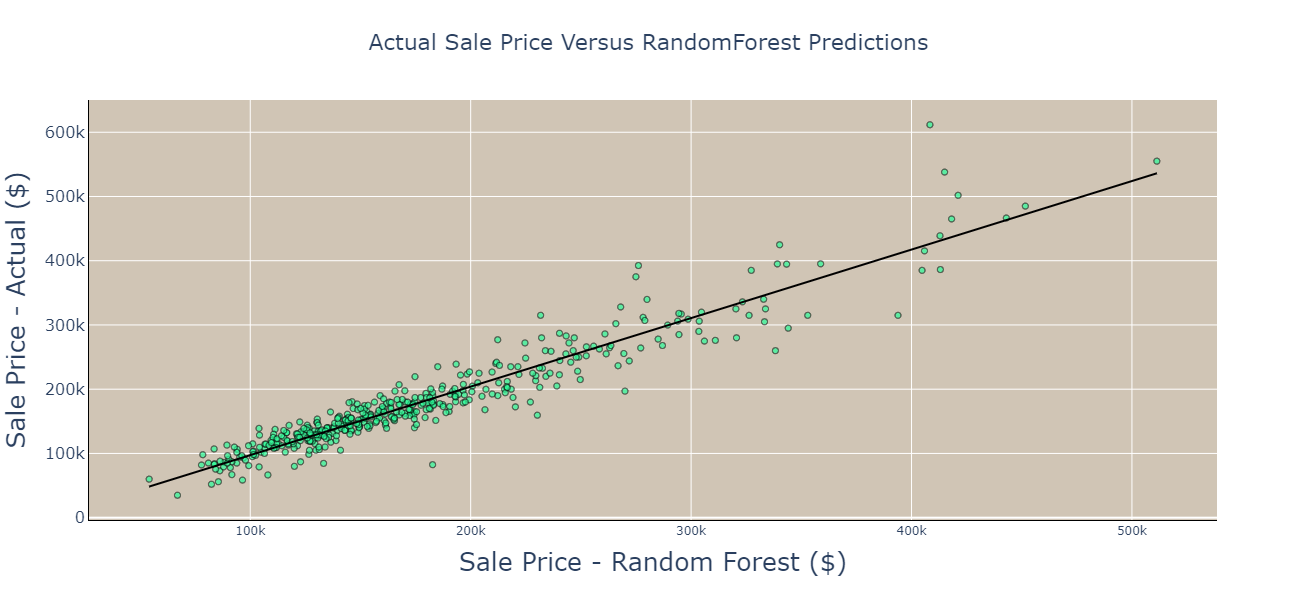

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     4237.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          4.43e-225
Time:                        08:40:26   Log-Likelihood:                -4998.0
No. Observations:                 433   AIC:                         1.000e+04
Df Residuals:                     431   BIC:                         1.001e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9348.1249   3147.335     -2.970      0.0

In [155]:
fig = px.scatter(FullPredictions, x = 'RandomForest', y ='Actual',title = 'Actual Sale Price Versus RandomForest Predictions',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    xaxis_title = 'Sale Price - Random Forest ($)',
    yaxis_title = 'Sale Price - Actual ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 22),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

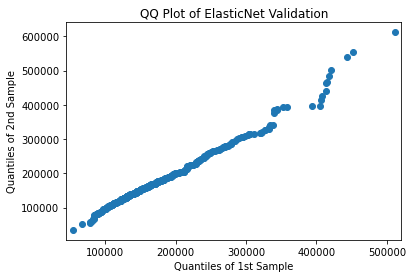

In [156]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = sm.ProbPlot(FullPredictions.RandomForest)
pp_y = sm.ProbPlot(FullPredictions.Actual)
qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot of ElasticNet Validation')
plt.savefig('../Images/RandomForestQQ.png')
plt.show()

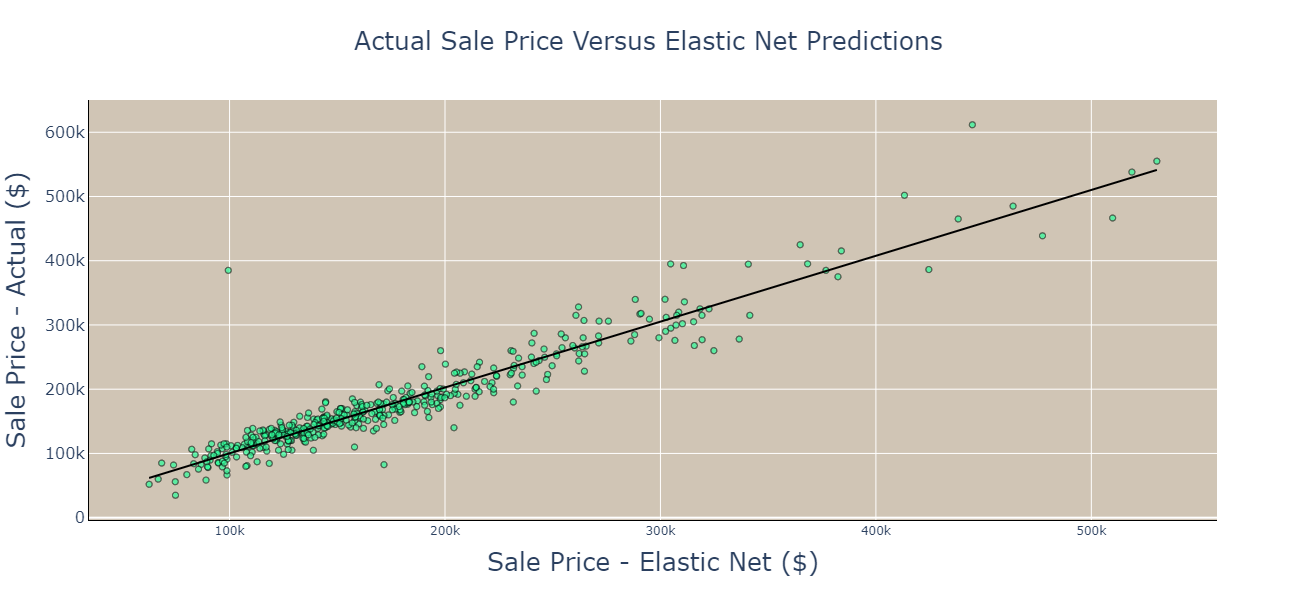

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     4042.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          4.33e-221
Time:                        08:34:42   Log-Likelihood:                -5007.3
No. Observations:                 433   AIC:                         1.002e+04
Df Residuals:                     431   BIC:                         1.003e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2354.2164   3119.806     -0.755      0.4

In [152]:
fig = px.scatter(FullPredictions, x = 'ElasticNet', y ='Actual',title = 'Actual Sale Price Versus Elastic Net Predictions',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    xaxis_title = 'Sale Price - Elastic Net ($)',
    yaxis_title = 'Sale Price - Actual ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

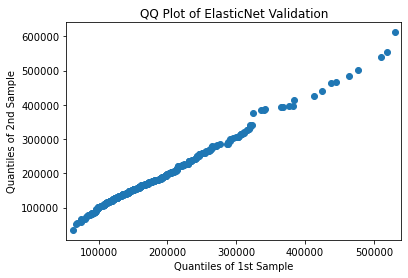

In [153]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = sm.ProbPlot(FullPredictions.ElasticNet)
pp_y = sm.ProbPlot(FullPredictions.Actual)
qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot of ElasticNet Validation')
plt.savefig('../Images/LassoQQ.png')
plt.show()

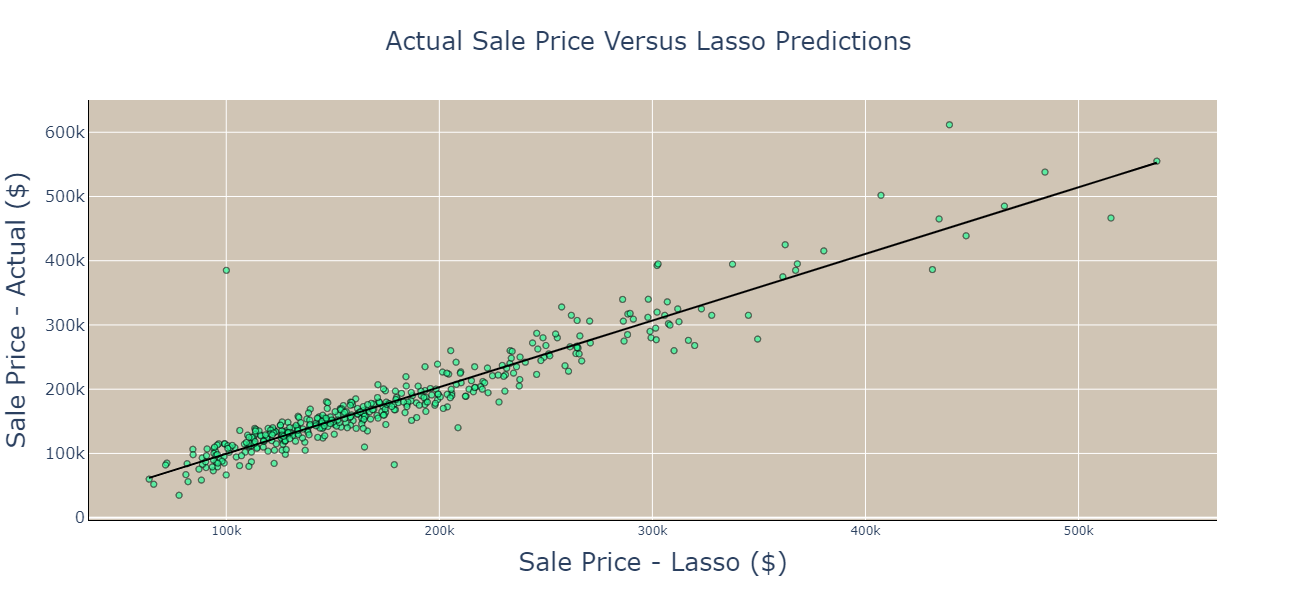

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     3877.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):          1.42e-217
Time:                        17:26:39   Log-Likelihood:                -5015.4
No. Observations:                 433   AIC:                         1.003e+04
Df Residuals:                     431   BIC:                         1.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4229.1583   3212.178     -1.317      0.1

In [144]:
fig = px.scatter(FullPredictions, x = 'Lasso', y ='Actual',title = 'Actual Sale Price Versus Lasso Predictions',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    xaxis_title = 'Sale Price - Lasso ($)',
    yaxis_title = 'Sale Price - Actual ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

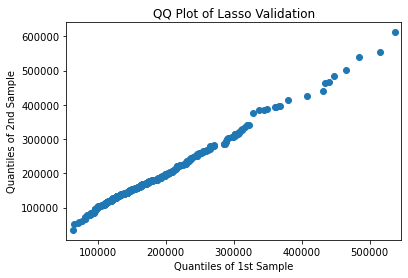

In [148]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = sm.ProbPlot(FullPredictions.Lasso)
pp_y = sm.ProbPlot(FullPredictions.Actual)
qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot of Lasso Validation')
plt.savefig('../Images/LassoQQ.png')
plt.show()

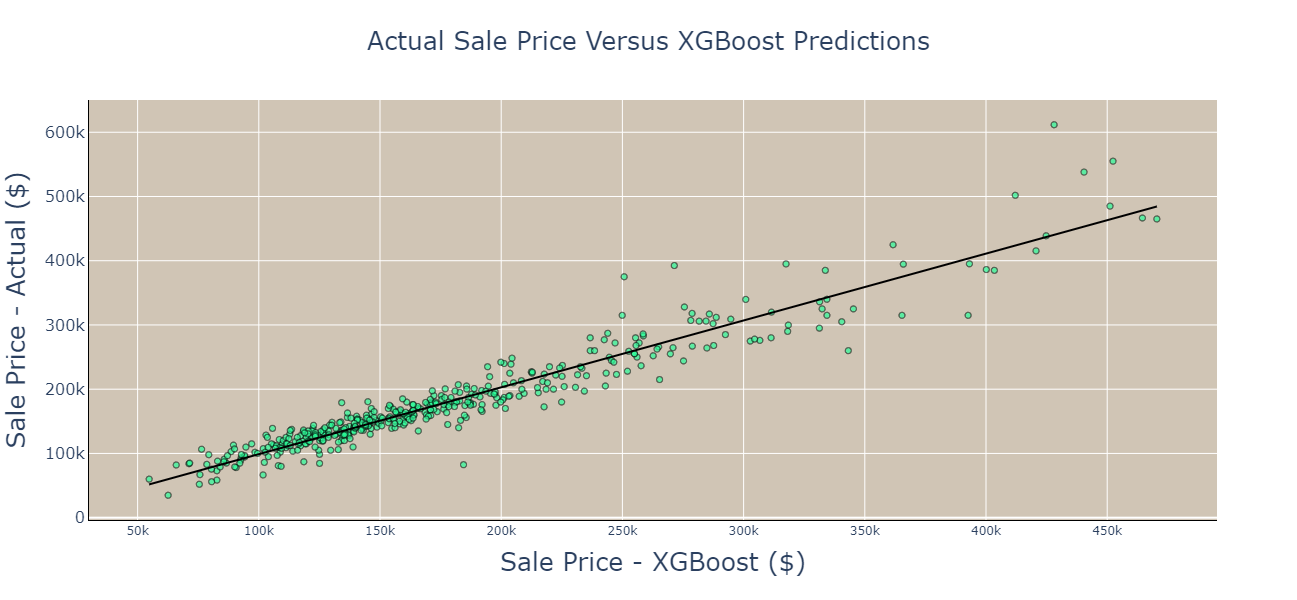

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     4756.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          5.95e-235
Time:                        09:21:13   Log-Likelihood:                -4975.2
No. Observations:                 433   AIC:                             9954.
Df Residuals:                     431   BIC:                             9963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5201.3644   2917.351     -1.783      0.0

In [184]:
fig = px.scatter(FullPredictions, x = 'XGBoost', y ='Actual',title = 'Actual Sale Price Versus XGBoost Predictions',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    xaxis_title = 'Sale Price - XGBoost ($)',
    yaxis_title = 'Sale Price - Actual ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

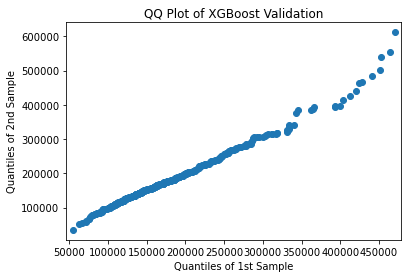

In [185]:
pp_x = sm.ProbPlot(FullPredictions.XGBoost)
pp_y = sm.ProbPlot(FullPredictions.Actual)
qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot of XGBoost Validation')
plt.savefig('../Images/XGQQ.png')
plt.show()

In [311]:
meltTemp = pd.melt(FullPredictions, id_vars='Actual')
meltTemp
#fig = px.scatter(meltTemp.loc[meltTemp['variable'].isin(['RandomForest', 'Lasso', 'ElasticNet','XGBoost'])], x = 'Actual', y = 'value', color = 'variable')
#fig


Actual      variable          value
0     173000.0  RandomForest  163671.311785
1     135000.0  RandomForest  145698.320615
2     267000.0  RandomForest  255788.924539
3     161000.0  RandomForest  144077.917733
4     136000.0  RandomForest  142846.154694
...        ...           ...            ...
3892  135750.0           TSS   28581.504698
3893  192500.0           TSS   28168.495302
3894  146500.0           TSS   17831.504698
3895  118500.0           TSS   45831.504698
3896   84900.0           TSS   79431.504698

[3897 rows x 3 columns]

In [312]:
inv_boxcox(mean_test[0], y_trainLambda)

164331.50469807434

In [313]:
FullPredictions['RandomForest_Variance'] = abs((FullPredictions['RandomForest'] - FullPredictions['Actual']))
FullPredictions['ElasticNet_Variance'] = abs((FullPredictions['ElasticNet'] - FullPredictions['Actual']))
FullPredictions['Lasso_Variance'] = abs((FullPredictions['Lasso'] - FullPredictions['Actual']))
FullPredictions['XGBoost_Variance'] = abs((FullPredictions['XGBoost'] - FullPredictions['Actual']))
FullPredictions['TSS'] = abs(FullPredictions['Actual']-164331.50469807434)
FullPredictions

RandomForest     ElasticNet          Lasso        XGBoost    Actual  \
0    163671.311785  176130.522916  173535.785049  154322.671875  173000.0   
1    145698.320615  166783.995617  166238.096742  165804.187500  135000.0   
2    255788.924539  265489.198334  264573.485761  278837.906250  267000.0   
3    144077.917733  157967.488598  161509.516645  157478.859375  161000.0   
4    142846.154694  135763.715666  138189.107823  143122.468750  136000.0   
..             ...            ...            ...            ...       ...   
428  115194.740922  108307.174725  106334.320456  112985.500000  135750.0   
429  209754.556572  193816.581063  199411.185335  197043.406250  192500.0   
430  148229.376458  151084.751502  148875.187377  156127.187500  146500.0   
431  119107.433585  113521.656099  113488.348484  120969.648438  118500.0   
432   89591.565143   97579.168200   96027.726841   92174.945312   84900.0   

     RandomForest_Variance  ElasticNet_Variance  Lasso_Variance  \
0              9328.688215          3130.522916      535.785049   
1             10698.320615         31783.995617    31238.096742   
2             11211.075461          1510.801666     2426.514239   
3             16922.082267          3032.511402      509.516645   
4              6846.154694           236.284334     2189.107823   
..                     ...                  ...             ...   
428           20555.259078         27442.825275    29415.679544   
429           17254.556572          1316.581063     6911.185335   
430            1729.376458          4584.751502     2375.187377   
431             607.433585          4978.343901     5011.651516   
432            4691.565143         12679.168200    11127.726841   

     XGBoost_Variance            TSS  
0        18677.328125    8668.495302  
1        30804.187500   29331.504698  
2        11837.906250  102668.495302  
3         3521.140625    3331.504698  
4         7122.468750   28331.504698  
..                ...            ...  
428      22764.500000   28581.504698  
429       4543.406250   28168.495302  
430       9627.187500   17831.504698  
431       2469.648437   45831.504698  
432       7274.945312   79431.504698  

[433 rows x 10 columns]

In [314]:
ScoreDF = pd.DataFrame({
    'RandomForestMAE': [FullPredictions.RandomForest_Variance.sum()/(len(FullPredictions.index))],
    'RandomForestRSS': [FullPredictions.RandomForest_Variance.sum()**2],
    'ElasticNetMAE': [FullPredictions.ElasticNet_Variance.sum()/(len(FullPredictions.index))],
    'ElasticNetRSS': [FullPredictions.ElasticNet_Variance.sum()**2],
    'LassoMAE': [FullPredictions.Lasso_Variance.sum()/(len(FullPredictions.index))],
    'LassoRSS': [FullPredictions.Lasso_Variance.sum()**2],
    'XGBoostMAE': [FullPredictions.XGBoost_Variance.sum()/(len(FullPredictions.index))],
    'XGBoostRSS': [(FullPredictions.XGBoost_Variance.sum())**2],
    'TSS' : [FullPredictions.TSS.sum()**2]
})
ScoreDF

    

RandomForestMAE  RandomForestRSS  ElasticNetMAE  ElasticNetRSS  \
0     16418.919636     5.054346e+13   15268.257712   4.370738e+13   

       LassoMAE      LassoRSS    XGBoostMAE    XGBoostRSS           TSS  
0  15710.832603  4.627796e+13  15015.999901  4.227507e+13  5.889305e+14

In [315]:
ScoreDF['RandomForestRSquared'] = 1-(ScoreDF.RandomForestRSS/ScoreDF.TSS)
ScoreDF['ElasticNetRSquared'] = 1-(ScoreDF.ElasticNetRSS/ScoreDF.TSS)
ScoreDF['LassoRSquared'] = 1-(ScoreDF.LassoRSS/ScoreDF.TSS)
ScoreDF['XGBoostRSquared'] = 1-(ScoreDF.XGBoostRSS/ScoreDF.TSS)



In [316]:
ScoreDF

RandomForestMAE  RandomForestRSS  ElasticNetMAE  ElasticNetRSS  \
0     16418.919636     5.054346e+13   15268.257712   4.370738e+13   

       LassoMAE      LassoRSS    XGBoostMAE    XGBoostRSS           TSS  \
0  15710.832603  4.627796e+13  15015.999901  4.227507e+13  5.889305e+14   

   RandomForestRSquared  ElasticNetRSquared  LassoRSquared  XGBoostRSquared  
0              0.914178            0.925785        0.92142         0.928217

In [317]:
EnsembleDF = FullPredictions.loc[:,['RandomForest', 'Lasso', 'XGBoost', 'ElasticNet', 'Actual']]

loopDF = FullPredictions.loc[:,['Actual']]
minMAE = float('Inf')
pLst = []
for i in [1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0]:
    for j in [1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0]:
        for k in [1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0]:
            for m in [1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0]:
                if (i + j + k + m) == 1:
                    loopDF['RandomForest'] = FullPredictions.RandomForest * i
                    loopDF['Lasso'] = FullPredictions.Lasso * j
                    loopDF['XGBoost'] = FullPredictions.XGBoost * k
                    loopDF['ElasticNet'] = FullPredictions.ElasticNet * m
                    loopDF['Prediction'] = loopDF['ElasticNet'] + loopDF['XGBoost'] + loopDF['Lasso'] + loopDF['RandomForest']
                    loopDF['Difference'] = loopDF['Prediction'] - loopDF['Actual']
                    loopDF['Diffsq'] = np.sqrt(loopDF['Difference']**2)
                    mae = loopDF.Diffsq.sum()/len(loopDF.index)
                    if mae < minMAE:
                        minMAE = mae
                        pLst = [i,j,k,m]
                        print(mae)


                        
        
    
    

16418.919636189432
16038.87700028581
15927.962721124892
15791.514961167873
15773.605016037916
15681.791411118978
15662.147243493591
15573.675603299222
15528.568384680819
15353.837357725279
15317.691238408275
15248.46984202327
15228.441383311285
15198.28146050506
15119.20520958073
15092.667630717906
15087.156008527878
15011.588508593024
14990.377920354671
14908.822368454734
14890.254780860467
14800.900177691658
14796.151507734314
14745.608958809153
14720.147324651449
14647.034461618387
14634.581256831114
14614.1867273098
14589.485137610323
14519.638004415248
14510.290011912572
14489.70868485213
14431.13177284437
14420.267172536678
14402.411857935764
14382.432078530732
14374.700787494992


In [318]:
pLst

[0, 0, 0.6, 0.4]

In [319]:
minMAE

14374.700787494992

# Ensembling Complete:
### RandomForest = 0.0
### Lasso = 0.0
### XGBoost = 0.5
### ElasticNet = 0.5

RandomState 0 gives MAE of 15,147m

RandomState 1 gives MAE of 15,556

# Let's Predict

In [320]:
finalSmartDF

BldgType  BsmtExposure  BsmtFinish  CentralAir  Condition1  Condition2  \
0            0             3    0.057913           1           1           2   
1            0             3    0.468980           1           2           2   
2            0             3    0.880047           1           2           2   
3            0             3    0.880047           1           2           2   
4            4             3    0.468980           1           2           2   
...        ...           ...         ...         ...         ...         ...   
1443         3             3   -1.175288           1           2           2   
1444         4             3   -0.353154           1           2           2   
1445         0             3    0.468980           1           2           2   
1446         0             0    0.880047           1           2           2   
1447         0             0   -0.764221           1           2           2   

      Electrical  ExterQual  Fireplaces  Foundation  ...  Neighborhood  \
0              3  -0.689132   -0.903337           1  ...            12   
1              3  -0.689132   -0.903337           1  ...            12   
2              3  -0.689132    0.642800           2  ...             8   
3              3  -0.689132    0.642800           2  ...             8   
4              3   1.022468   -0.903337           2  ...            22   
...          ...        ...         ...         ...  ...           ...   
1443           3  -0.689132   -0.903337           1  ...            10   
1444           3  -0.689132   -0.903337           1  ...            10   
1445           3  -0.689132    0.642800           1  ...            11   
1446           3  -0.689132   -0.903337           2  ...            11   
1447           3  -0.689132    0.642800           2  ...            11   

         OutSq  OverallQual  PavedDrive  SaleCondition  SaleType  Street  \
0     0.459817    -0.770668           2              4         8       1   
1     1.493139    -0.067057           2              4         8       1   
2     0.374216    -0.770668           2              4         8       1   
3     1.291366    -0.067057           2              4         8       1   
4     0.251929     1.340165           2              4         8       1   
...        ...          ...         ...            ...       ...     ...   
1443 -1.129911    -1.474279           2              4         8       1   
1444 -0.983167    -1.474279           2              0         8       1   
1445  1.768284    -0.770668           2              0         8       1   
1446 -0.445105    -0.770668           2              4         8       1   
1447  0.325301     0.636554           2              4         8       1   

         TotBr     TotSq  YearRemodAdd  
0    -1.482530 -0.959463     -1.084185  
1    -0.880875  0.160132     -1.226691  
2     0.322434  0.031633      0.673396  
3     0.322434 -0.002719      0.673396  
4    -0.279221  0.035450      0.388383  
...        ...       ...           ...  
1443 -0.880875 -1.137581     -0.656665  
1444 -0.880875 -1.137581     -0.656665  
1445 -0.279221 -0.107044      0.578391  
1446 -0.880875 -0.827148      0.388383  
1447  0.322434  0.590158      0.483387  

[1448 rows x 32 columns]

In [321]:
# Lasso Predicitons
finLasPred = gridLasso.predict(finalDF)

In [322]:
# RandomForest Predictions
finRFRPred = grid.predict(finalSmartDF)

In [323]:
# Create labels DF for XGBoost
df_y = pd.DataFrame(np.zeros((1448,1)))
df_y.columns = ['SalePrice']
df_y

SalePrice
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
...         ...
1443        0.0
1444        0.0
1445        0.0
1446        0.0
1447        0.0

[1448 rows x 1 columns]

In [324]:
# XGBoost Prediction
finXGBPred = loaded_model.predict(xgb.DMatrix(finalSmartDF, label=df_y))

In [325]:
# ElasticNet Prediction
finENPred = gridEn.predict(finalDF)

## Bring all Predictions together and analyize

In [326]:
FinalPred = pd.concat([inv_boxcox(pd.Series(finLasPred), y_trainLambda), inv_boxcox(pd.Series(finRFRPred), y_trainLambda), inv_boxcox(pd.Series(finXGBPred), y_trainLambda), inv_boxcox(pd.Series(finENPred), y_trainLambda)], axis = 1)
FinalPred.columns = ['Lasso_Predictions', 'RandomForest_Predictions', 'XGBoost_Predictions', 'ElasticNet_Predictions']
FinalPred

Lasso_Predictions  RandomForest_Predictions  XGBoost_Predictions  \
0         116718.910086             113735.953943        115511.796875   
1         162259.833726             169283.924000        172208.203125   
2         174716.650913             175834.212629        181651.546875   
3         193948.628858             189088.677630        185634.531250   
4         200893.857735             200209.963111        190343.718750   
...                 ...                       ...                  ...   
1443       83830.808369              94605.758293         84820.531250   
1444       91584.823989              96057.253488         85176.414062   
1445      164667.216653             157863.474950        158728.750000   
1446      122698.810580             127888.411499        129703.835938   
1447      214979.278193             234496.614236        219439.984375   

      ElasticNet_Predictions  
0              117076.616165  
1              162882.446194  
2              178316.177200  
3              193938.867907  
4              202198.621540  
...                      ...  
1443            80975.285183  
1444            85246.046355  
1445           162191.072152  
1446           123283.619944  
1447           210724.475785  

[1448 rows x 4 columns]

## Let's Visualize the Deltas of all our predictions against eachother

In [327]:
AA = FinalPred
AA['Delta:Lasso-RanForest'] = AA.RandomForest_Predictions - AA.Lasso_Predictions
AA['Delta:Lasso-XGBoost'] = AA.XGBoost_Predictions - AA.Lasso_Predictions
AA['Delta:Lasso-ElasticNet'] = AA.ElasticNet_Predictions - AA.Lasso_Predictions
AA['Delta:XGBoost-RanForest'] = AA.RandomForest_Predictions - AA.XGBoost_Predictions
AA['Delta:XGBoost-ElasticNet'] = AA.ElasticNet_Predictions - AA.XGBoost_Predictions
AA['Delta:RanForest-ElasticNet'] = AA.ElasticNet_Predictions - AA.RandomForest_Predictions

AA.drop(['Lasso_Predictions', 'RandomForest_Predictions', 'XGBoost_Predictions', 'ElasticNet_Predictions'], axis =1, inplace = True)
AAmelt = pd.melt(AA)
AAmelt



variable         value
0          Delta:Lasso-RanForest  -2982.956144
1          Delta:Lasso-RanForest   7024.090274
2          Delta:Lasso-RanForest   1117.561716
3          Delta:Lasso-RanForest  -4859.951228
4          Delta:Lasso-RanForest   -683.894624
...                          ...           ...
8683  Delta:RanForest-ElasticNet -13630.473111
8684  Delta:RanForest-ElasticNet -10811.207133
8685  Delta:RanForest-ElasticNet   4327.597202
8686  Delta:RanForest-ElasticNet  -4604.791555
8687  Delta:RanForest-ElasticNet -23772.138451

[8688 rows x 2 columns]

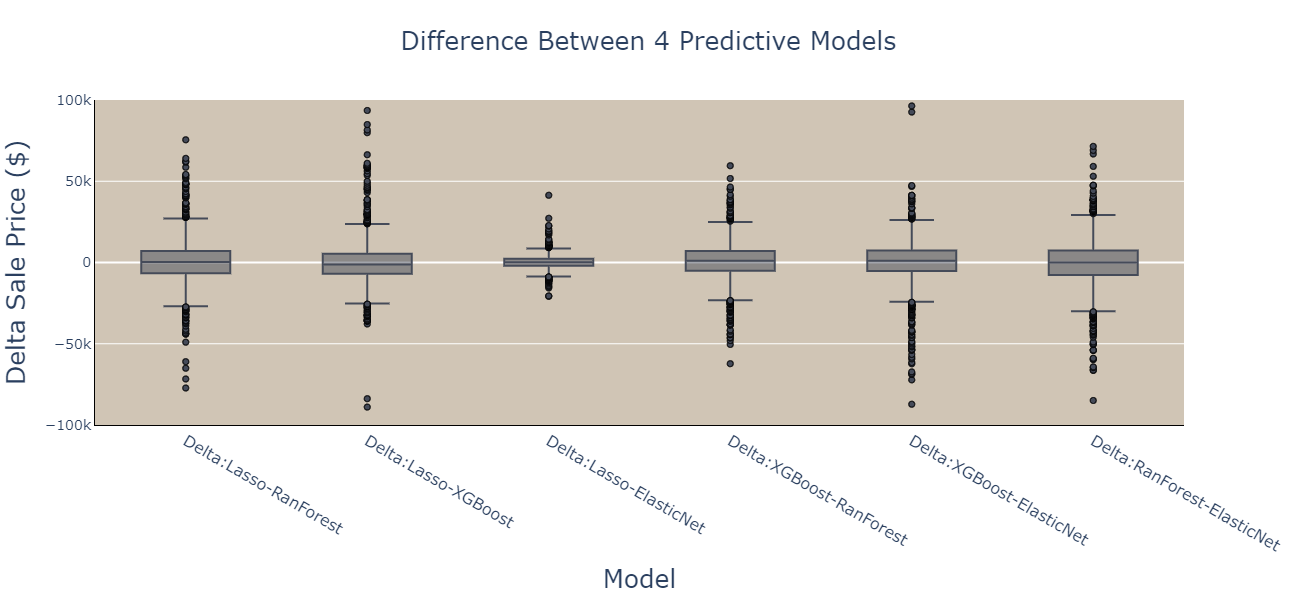

In [334]:
fig = px.box(AAmelt, y = 'value', x = 'variable', color_discrete_sequence = ['#454b59'], title = 'Difference Between 4 Predictive Models',
            labels = {
                'Delta:Lasso-RanForest': 'Lasso-RanFrst'
            
            }
            )
fig.update_layout(
    xaxis_title = 'Model',
    yaxis_title = 'Delta Sale Price ($)',
    title_x=0.5,
    height = 600,
    width = 1300,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=14),
        titlefont = dict(size = 25),
        showline = True,
        linecolor = 'black',
        range = [-100000,100000]
    ),
    xaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size =25),

        linecolor = 'black'        
    )    
)
for t in fig.data:
    t.marker.line.width = 1
    t.marker.line.color = "black"
fig

## Random Forest and XGBoost agree with each other the most
**Will use 50% XGBoost and 50% ElasticNet**

In [329]:
FinalPred = pd.concat([inv_boxcox(pd.Series(finLasPred), y_trainLambda), inv_boxcox(pd.Series(finRFRPred), y_trainLambda), inv_boxcox(pd.Series(finXGBPred), y_trainLambda), inv_boxcox(pd.Series(finENPred), y_trainLambda)], axis = 1)
FinalPred.columns = ['Lasso_Predictions', 'RandomForest_Predictions', 'XGBoost_Predictions', 'ElasticNet_Predictions']
FinalPredictions = (0.5 * FinalPred['XGBoost_Predictions']) + (.5* FinalPred['ElasticNet_Predictions'])

## Let's look at the distribution between my predicitions and the given dataset

In [330]:
BB = pd.DataFrame(FinalPredictions)
BB['TrainSalePrice'] = inv_boxcox(y_train['SalePrice'], y_trainLambda)
BB.columns = ['Predicted Sale Price', 'Disclosed Sale Price']
BBmelt = pd.melt(BB)
BBmelt

variable          value
0     Predicted Sale Price  116294.206520
1     Predicted Sale Price  167545.324660
2     Predicted Sale Price  179983.862037
3     Predicted Sale Price  189786.699579
4     Predicted Sale Price  196271.170145
...                    ...            ...
2891  Disclosed Sale Price            NaN
2892  Disclosed Sale Price            NaN
2893  Disclosed Sale Price            NaN
2894  Disclosed Sale Price            NaN
2895  Disclosed Sale Price            NaN

[2896 rows x 2 columns]

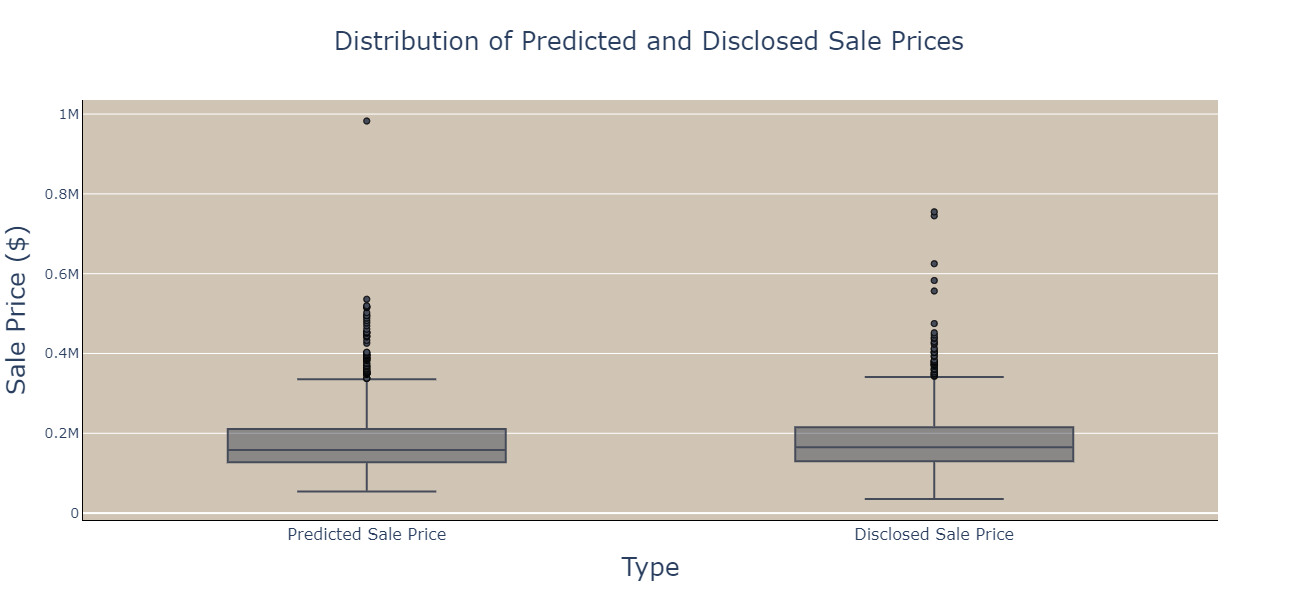

In [417]:
fig = px.box(BBmelt, y = 'value', x = 'variable', color_discrete_sequence = ['#454b59', '881600'], title = 'Distribution of Predicted and Disclosed Sale Prices')
fig.update_layout(
    xaxis_title = 'Type',
    yaxis_title = 'Sale Price ($)',
    title_x=0.5,
    height = 600,
    width = 1300,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=14),
        titlefont = dict(size = 25),
        showline = True,
        linecolor = 'black'
       
    ),
    xaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size =25),

        linecolor = 'black'        
    )    
)
for t in fig.data:
    t.marker.line.width = 1
    t.marker.line.color = "black"
fig

In [337]:
FP = FullPredictions.iloc[:, 0:5]
FP

RandomForest     ElasticNet          Lasso        XGBoost    Actual
0    163671.311785  176130.522916  173535.785049  154322.671875  173000.0
1    145698.320615  166783.995617  166238.096742  165804.187500  135000.0
2    255788.924539  265489.198334  264573.485761  278837.906250  267000.0
3    144077.917733  157967.488598  161509.516645  157478.859375  161000.0
4    142846.154694  135763.715666  138189.107823  143122.468750  136000.0
..             ...            ...            ...            ...       ...
428  115194.740922  108307.174725  106334.320456  112985.500000  135750.0
429  209754.556572  193816.581063  199411.185335  197043.406250  192500.0
430  148229.376458  151084.751502  148875.187377  156127.187500  146500.0
431  119107.433585  113521.656099  113488.348484  120969.648438  118500.0
432   89591.565143   97579.168200   96027.726841   92174.945312   84900.0

[433 rows x 5 columns]

**distributions look pretty similar and are centered pretty close to each other**

In [343]:
from sklearn.model_selection import train_test_split
FPX_train, FPX_test, FPy_train, FPy_test = train_test_split(FP.drop(['Actual'], axis = 1),FP['Actual'] , test_size=0.3, shuffle = True, random_state=1)


In [346]:

parametersGrid = {"max_iter": [15, 18, 20, 22],
                "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                "l1_ratio": np.arange(0.0, 1.0, 0.1)}
eNet = ElasticNet(normalize=True)
EnsembleGrid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10, n_jobs = -1)
EnsembleGrid.fit(FPX_train,FPy_train)
EnsemblePredictions = EnsembleGrid.predict(FPX_test)
    

In [349]:
EnsemblePredictions

array([222562.27533146, 179477.07661607, 246422.71157484, 154272.6320525 ,
       145457.47934476, 312417.08744516, 314419.61428862, 175036.62300538,
        98248.21607997, 139085.20407663, 227865.66831675, 293029.07804121,
       110070.62716018, 334086.07912738, 186407.19726829, 177267.80305183,
       226593.26816579, 176998.85699455,  70761.5704102 , 117996.36499258,
       166862.0110973 , 127334.41400451, 225727.76880775, 239367.47828737,
       261183.18798762, 144265.22297445, 196394.53576973, 129869.55357854,
       189238.35053959, 142595.75784371, 116675.26729213, 126466.49723402,
       185777.39815099, 154345.0784299 , 117247.30907203, 105628.7803461 ,
       185193.82353191, 235862.08143191, 119829.70669035, 307232.65991832,
       209540.45343561, 144662.13007401, 105391.87471277, 155734.68095818,
       170858.15169221, 160466.77003754, 253639.48675818, 153401.23610007,
       164254.59674054,  85063.83955586, 356484.04666422, 100890.61097592,
       144670.64074156, 1

In [347]:
gridEn.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.4, 'max_iter': 18}

In [350]:
PredGridEnsemble = pd.concat([pd.Series(EnsemblePredictions), FPy_test.reset_index(drop=True)], axis = 1)
PredGridEnsemble.columns = ['Predicted', 'Actual']
PredGridEnsemble


Predicted    Actual
0    222562.275331  235000.0
1    179477.076616  180000.0
2    246422.711575  272000.0
3    154272.632052  155000.0
4    145457.479345  164500.0
..             ...       ...
125   95003.195451   95000.0
126  163939.067177  168500.0
127   93595.935800   97000.0
128  214384.343345  190000.0
129  117881.386414  127000.0

[130 rows x 2 columns]

In [353]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(PredGridEnsemble.Predicted, PredGridEnsemble.Actual)
r_value

0.9615460475587057

In [354]:
std_err

0.02436376113376959

In [357]:
abs(PredGridEnsemble.Predicted-PredGridEnsemble.Actual).sum()/len(PredGridEnsemble)

13661.221285246223

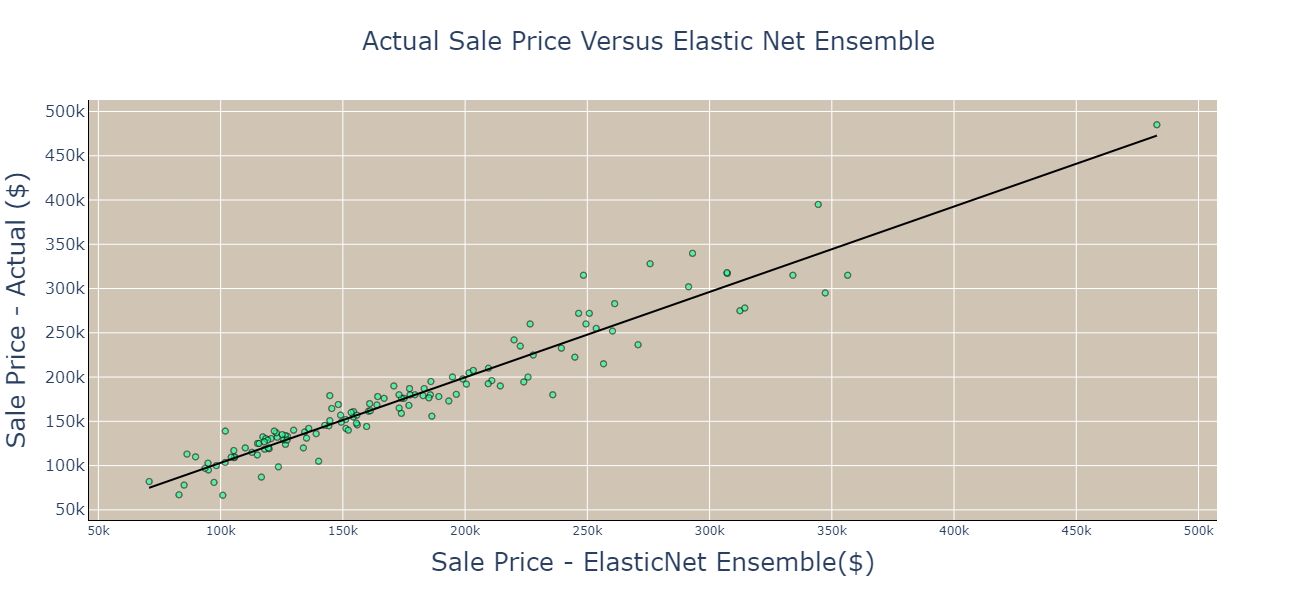

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1569.
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           1.06e-73
Time:                        11:57:22   Log-Likelihood:                -1465.8
No. Observations:                 130   AIC:                             2936.
Df Residuals:                     128   BIC:                             2941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6638.4122   4586.651      1.447      0.1

In [363]:
fig = px.scatter(PredGridEnsemble, x = 'Predicted', y ='Actual',title = 'Actual Sale Price Versus Elastic Net Ensemble',
                         color_discrete_sequence = ['#2AFC98', '#4B7F52','#DE541E' ],
                 trendline = 'ols',
                 trendline_color_override="black",
                 opacity = 0.7,
                 width = 600,
                 height = 600,
                labels = {'variable':'Feature'}
                )


fig.update_layout(
    xaxis_title = 'Sale Price - ElasticNet Ensemble($)',
    yaxis_title = 'Sale Price - Actual ($)',
    title_x=0.5,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),

    yaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size = 25),
        linecolor = 'black',

    ),
    xaxis = dict(
        tickfont = dict(size=12),
        titlefont = dict(size =25),
        linecolor = 'black'  ,

    ),
    legend=dict(
        yanchor='top',
        y = .98,
        xanchor='right',
        x = 0.98
    )   
)
fig.update_traces(marker=dict(size=6,
                              line=dict(width=1,
                                        color='black')),
                  selector=dict(mode='markers'))
fig.show()
results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

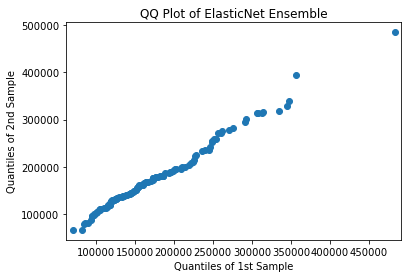

In [360]:
pp_x = sm.ProbPlot(PredGridEnsemble.Predicted)
pp_y = sm.ProbPlot(PredGridEnsemble.Actual)
qqplot_2samples(pp_x, pp_y)
plt.title('QQ Plot of ElasticNet Ensemble')
plt.savefig('../Images/EnEnsembleQQ.png')
plt.show()

In [365]:
FEGP = EnsembleGrid.predict(FinalPred)

In [368]:
inv_boxcox(y_train['SalePrice'], y_trainLambda)

0       175000.0
1       262280.0
2       125500.0
3        88000.0
4       172785.0
          ...   
1004    135000.0
1005    145000.0
1006    274725.0
1007    185500.0
1008     91500.0
Name: SalePrice, Length: 1009, dtype: float64

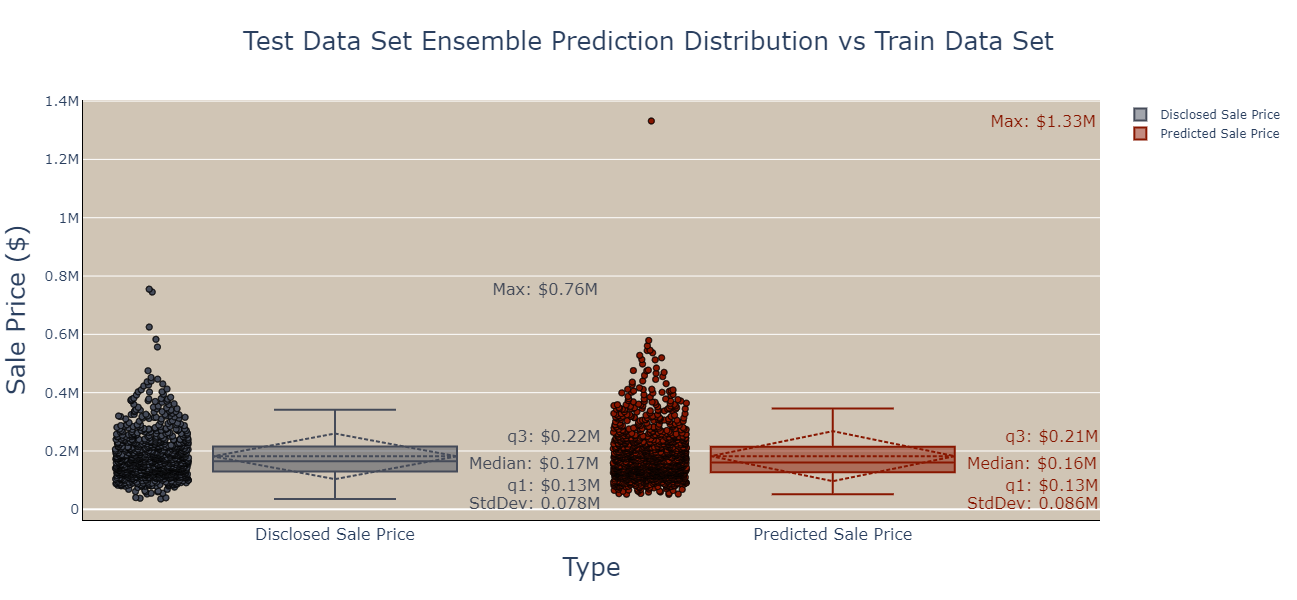

In [416]:
fig = go.Figure()
fig.add_trace(go.Box(name='Disclosed Sale Price', y=inv_boxcox(y_train['SalePrice'], y_trainLambda), marker_color = '#454b59', boxpoints='all', boxmean='sd'))
fig.add_trace(go.Box(name='Predicted Sale Price',  y=FEGP,  marker_color = '#881600', boxpoints='all', boxmean='sd'))
fig.add_annotation(x=1.4, y=1330000, #Max
            text="    Max: $1.33M",
             showarrow=False,
            font=dict(size=16,
                     color = '#881600'
                     )           
                  )
fig.add_annotation(x=1.4, y=160000, #Max
            text="Median: $0.16M",
             showarrow=False,
            font=dict(size=16,
                     color = '#881600'
                     )           
                  )
fig.add_annotation(x=1.4, y=20000, #Max
            text="StdDev: 0.086M",
             showarrow=False,
            font=dict(size=16,
                     color = '#881600'
                     )           
                  )
fig.add_annotation(x=1.4, y=250000, #Max
            text="       q3: $0.21M",
             showarrow=False,
            font=dict(size=16,
                     color = '#881600'
                     )           
                  )
fig.add_annotation(x=1.4, y=85000, #Max
            text="       q1: $0.13M",
             showarrow=False,
            font=dict(size=16,
                     color = '#881600'
                     )           
                  )
fig.add_annotation(x=.4, y=755000, #Max
            text="    Max: $0.76M",
             showarrow=False,
            font=dict(size=16,
                     color = '#454b59'
                     )           
                  )
fig.add_annotation(x=.4, y=160000, #Max
            text="Median: $0.17M",
             showarrow=False,
            font=dict(size=16,
                     color = '#454b59'
                     )           
                  )
fig.add_annotation(x=.4, y=20000, #Max
            text="StdDev: 0.078M",
             showarrow=False,
            font=dict(size=16,
                     color = '#454b59'
                     )           
                  )
fig.add_annotation(x=.4, y=250000, #Max
            text="       q3: $0.22M",
             showarrow=False,
            font=dict(size=16,
                     color = '#454b59'
                     )           
                  )
fig.add_annotation(x=.4, y=85000, #Max
            text="       q1: $0.13M",
             showarrow=False,
            font=dict(size=16,
                     color = '#454b59'
                     )           
                  )

fig.update_layout(
    xaxis_title = 'Type',
    yaxis_title = 'Sale Price ($)',
    title= 'Test Data Set Ensemble Prediction Distribution vs Train Data Set',
    title_x=0.5,
    height = 600,
    width = 1300,
    plot_bgcolor = '#d0c5b5',
    title_font = dict(size = 25),
    yaxis = dict(
        tickfont = dict(size=14),
        titlefont = dict(size = 25),
        showline = True,
        linecolor = 'black'
       
    ),
    xaxis = dict(
        tickfont = dict(size=16),
        titlefont = dict(size =25),

        linecolor = 'black'        
    )

)
for t in fig.data:
    t.marker.line.width = 1
    t.marker.line.color = "black"
fig.update_traces(marker_line_color = 'black', marker_line_width=1, opacity=1)
fig